### Import stuff

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from scipy import optimize
import time
from tqdm import tqdm
from saxs import ScatterData

# Load data

### Load data from EuXFEL

In [72]:

# Path where XFEL data is 
XFEL_path = '/home/leonardo/SAXS_222711/data_csv/Hamburg_data'

# Get the time points of the the data, as well as time resolved data
time_points = np.array([float(file.replace('us_averaged.npy','')) for file in os.listdir(XFEL_path) if 'us' in file])
XFEL_tr = np.array([os.path.join(XFEL_path,file) for file in os.listdir(XFEL_path) if 'us' in file])

# Sort from slowest timpoints to the fastest timepoints. 
sort_ind = np.argsort(time_points)[::-1]
time_points = time_points[sort_ind]
XFEL_tr = XFEL_tr[sort_ind]

# Keep ScatterData in list for easy access 
XFEL_empty = [ScatterData() for i in range(6)]
# Load q vector from XFEL 
XFEL_q = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/q.npy')

# Iterate over time resolved data and set I and q for ScatterData
XFEL_data = []
for data,i in zip(XFEL_empty, XFEL_tr):
    intensity = np.load(i)
    data.set_data(XFEL_q,intensity)
    XFEL_data.append(data)

### Load SAXS data

In [281]:
#Load data from Diamond
df_temp20_dark = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_20C_average_average.dat.csv',names=['q', 'I1', 'I2'],index_col=False)
df_temp20_light = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_20C_480nm_average_average.dat.csv',names=['q', 'I1', 'I2'],index_col=False)

#Separate into light and dark 
diamond_q = df_temp20_dark['q'].to_numpy()
dark_I1 = df_temp20_dark['I1'].to_numpy()
light_I1 = df_temp20_light['I1'].to_numpy() 
diff_saxs1 = (light_I1 - dark_I1)

E_dark = df_temp20_dark['I2'].to_numpy()
E_light = df_temp20_light['I2'].to_numpy()
E_diff = (df_temp20_dark['I2'].to_numpy() + df_temp20_light['I2'].to_numpy())/2

### Load temperature experiment

In [277]:

df_temp19 = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_19C_average_average.dat.csv',names=['q', 'I1', 'I2'],index_col=False)
df_temp20 = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_20C_average_average.dat.csv',names=['q', 'I1', 'I2'],index_col=False)
df_temp21 = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_21C_average_average.dat.csv',names=['q', 'I1','I2'],index_col=False)
df_temp22 = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_22C_average_average.dat.csv',names=['q', 'I1','I2'],index_col=False)
df_temp30 = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_30C_average_average.dat.csv',names=['q', 'I1','I2'],index_col=False)
df_temp40 = pd.read_csv('/home/leonardo/SAXS_222711/data_csv/AsLOV2_15mgml_40C_average_average.dat.csv',names=['q', 'I1','I2'],index_col=False)

q= df_temp20['q'].to_numpy()

I19 = df_temp19['I1'].to_numpy()
I20 = df_temp20['I1'].to_numpy()
I21 = df_temp21['I1'].to_numpy()
I22 = df_temp22['I1'].to_numpy()
I30 = df_temp30['I1'].to_numpy()
I40 = df_temp40['I1'].to_numpy()





### Load dark data from XFEL

In [278]:
#Load dark_data from XFEL
Dark_172 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_off_runr0172.npy')
Dark_174 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_off_runr0174.npy')
Dark_175 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_off_runr0175.npy')
Dark_176 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_off_runr0176.npy')
Dark_180 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_off_runr0180.npy')

Class1 = [Dark_172, Dark_174, Dark_175, Dark_176, Dark_180]
S_offs = np.zeros((len(Class1),176,hamburg_q.shape[0]))

for i, run in enumerate(Class1): #Class1):
    S_offs[i] = run[:176]
avg_S_off = (np.sum(S_offs,axis=0)/len(Class1))




### Load light data from XFEL

In [279]:
#Load light_data from XFEL
Dark_172 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_on_runr0172.npy')
Dark_174 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_on_runr0174.npy')
Dark_175 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_on_runr0175.npy')
Dark_176 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_on_runr0176.npy')
Dark_180 = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/S_on_runr0180.npy')

Class1 = [Dark_172, Dark_174, Dark_175, Dark_176, Dark_180]
S_ons = np.zeros((len(Class1),176,hamburg_q.shape[0]))

for i, run in enumerate(Class1): #Class1):
    S_ons[i] = run[:176]
avg_S_on = (np.sum(S_ons,axis=0)/len(Class1))


### Load buffer data from XFEL

In [280]:
#Load buffer data from XFEL

Buffer_133_off = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/Buffer_off_runr0133.npy')
Buffer_133_on = np.load(f'/home/leonardo/SAXS_222711/data_csv/Hamburg_data/Buffer_on_runr0133.npy')
buffer_on=np.nansum(Buffer_133_on[150:175,:],axis = 0)/25
buffer_off=np.nansum(Buffer_133_off[150:175,:],axis = 0)/25



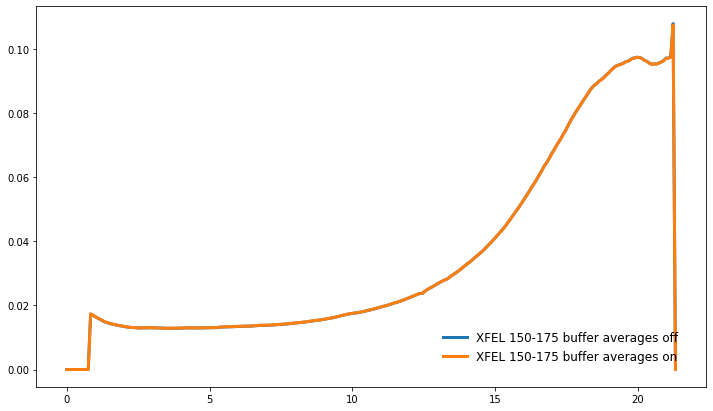

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

#for b in range(Buffer_133.shape[0]): 
 #       ax.plot(hamburg_q,Buffer_133[b,:],linewidth=3.0, label='XFEL buffer')
#ax.plot(hamburg_q,np.nansum(Buffer_133[174:175,:],axis = 0)/2,linewidth=3.0, label='XFEL 174-175 buffer averages')
ax.plot(hamburg_q,np.nansum(Buffer_133_off[150:175,:],axis = 0)/25,linewidth=3.0, label='XFEL 150-175 buffer averages off')
ax.plot(hamburg_q,np.nansum(Buffer_133_on[150:175,:],axis = 0)/25,linewidth=3.0, label='XFEL 150-175 buffer averages on')
#ax.plot(hamburg_q,np.nansum(Buffer_133[80:50,:],axis = 0)/31,linewidth=3.0, label='XFEL 80-50 buffer averages')
#ax.plot(hamburg_q,np.nansum(Buffer_133[:176,:],axis = 0)/176,linewidth=3.0, label='XFEL all buffer averages_start')
ax.legend(loc=(0.6,0.05), frameon = False,fontsize=12)
#ax.set_ylim([-0.001,0.001])
#ax.plot(hamburg_q,buffer=np.nansum(Buffer_133[174:175,:],axis = 0)/2,linewidth=3.0, label='XFEL 2 buffer averages')



# Temperature differences

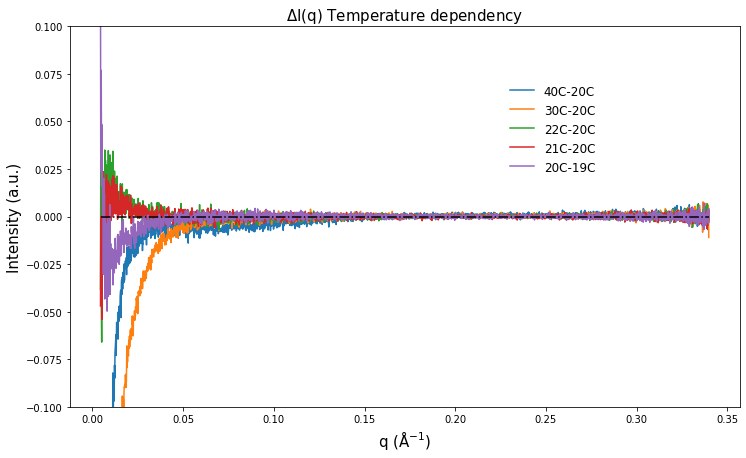

In [562]:

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

ax.set_ylim([-.1,.1])

ax.plot(diamond_q,I40-I20, label='40C-20C')
ax.plot(diamond_q,I30-I20,label='30C-20C')
ax.plot(diamond_q,I22-I20, label='22C-20C')
ax.plot(diamond_q,I21-I20, label='21C-20C')
ax.plot(diamond_q,I20-I19, label='20C-19C')
ax.legend(loc=(0.65,0.6), frameon = False,fontsize=12)
ax.set_title(r'$\Delta$I(q) Temperature dependency',fontsize=15)
ax.hlines(0, xmin = q[0], xmax = 0.34, color='k', linestyle='-.')
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (Å$^{-1}$)',fontsize=15)

plt.savefig(f'/home/leonardo/SAXS_222711/Plots/Temperature_diff_curve.png',bbox_inches='tight',facecolor=(1, 1, 1))

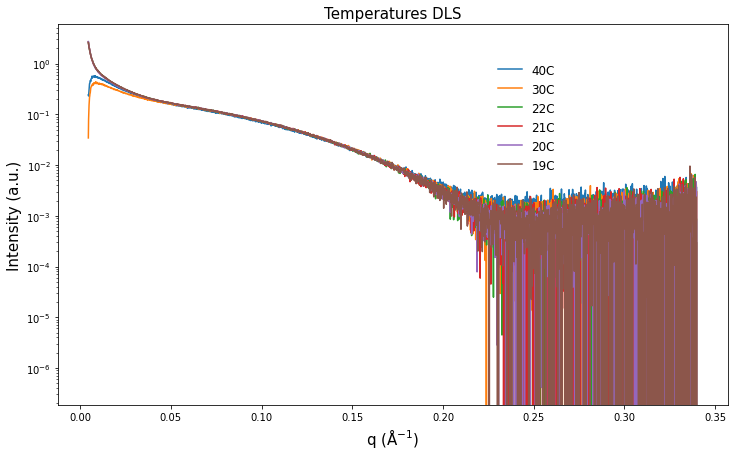

In [559]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
#Plot data
#ax.set_ylim([-.1,0.5])
ax.plot(diamond_q,I40, label='40C')
ax.plot(diamond_q,I30,label='30C')
ax.plot(diamond_q,I22, label='22C')
ax.plot(diamond_q,I21, label='21C')
ax.plot(diamond_q,I20, label='20C')
ax.plot(diamond_q,I19, label='19C')
ax.legend(loc=(0.65,0.6), frameon = False,fontsize=12)
ax.set_title('Temperatures DLS',fontsize=15)
ax.set_yscale('log')
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (Å$^{-1}$)',fontsize=15)
ax.hlines(0, xmin = q[0], xmax =0.34, color='k', linestyle='-.')
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/Temperature_curves_lin-log.png',bbox_inches='tight',facecolor=(1, 1, 1))

# Chisquare


In [366]:
def chi_sq(v1,v2,error):
    calc_factor = lambda x: np.nansum(((v1-(v2*x))/(error))**2)

    minimum = optimize.fmin(func=calc_factor,x0=20, retall=True)
    return minimum

# Interpolate

In [149]:
def interpolate_curve(q_ref, q,curve):
    interpolated_curve = np.interp(q_ref, q, curve)
    return interpolated_curve

# AF2 - Simulated diff curves


## Load AF2 path and PDB crystal structure path

In [21]:
files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
ref = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/ref.txt'
ref = np.loadtxt(ref,usecols=[1,2], delimiter=',').T
crysol_q=np.loadtxt(files[0], usecols=1, delimiter=',')

    

### Small functions

In [754]:
def interpolate_curve(q_ref, q,curve):
    interpolated_curve = np.interp(q_ref, q, curve)
    return interpolated_curve

In [755]:
def SSE(v1,v2, guess):
    calc_factor = lambda x: np.nansum((v1-(v2*x))**2)
    answer = optimize.fmin(func=calc_factor,x0=guess,full_output=True,disp=False)
    minimum = answer[0]
    fopt = answer[1]
    return minimum,fopt

In [756]:
from sklearn.metrics import r2_score

def calc_r2(v1,fit):
    r2 = r2_score(v1, fit)
    return r2

In [757]:
 def cut_q(q,qmax,qmin):
    indices = np.logical_and(q_min<=q, q<=q_max)
    q = q[indices]
    return q,indices 

## AF2 calc function

### Data call


In [1017]:
files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
files.sort()
ref = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/ref.txt'
ref = np.loadtxt(ref,usecols=[1,2], delimiter=',').T
crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',')*10
h1_af2 = h1[10:255]
h1_q = hamburg_q[10:255]


## Main function for calculating various metrics

In [392]:
def calc_metrics(q_min,q_max,k,n): 
    names = os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')
    names.sort()
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
    files.sort()
    #Decide what q-range
    theory_q,crysol_i = cut_q(crysol_q,q_max,q_min)
    xfel_q,xfel_i = cut_q(h1_q,q_max,q_min)
    xfel_cut = h1_af2[xfel_i]
    
    #interpolate exp diff data
    exp_interpolated = interpolate_curve(theory_q,xfel_q,xfel_cut)
    exp_scaled_occupancy = exp_interpolated * 1e5
    exp_scaled = exp_interpolated*1/theory_q
    
    #interpolat exp abs data
    dark_abs = np.sum(avg_S_off[150:175,:],axis = 0)/25
    dark_abs = (dark_abs - buffer_off*0.905)[10:255]
    interpolated_abs = interpolate_curve(theory_q,xfel_q,dark_abs[xfel_i])
    #Define list with metrics
    corr_final = []
    R2 = []
    fopts = []
    file1_index = []
    file2_index = []
    occupancies = []
    
    print(f'Running {2000-n} models')
    # Iterate over each file in the list of differences
    for file1,name in tqdm(zip(files[n:], names)):
        light = np.loadtxt(file1, usecols=2, delimiter=',')
        # Iterate over the files after first file in list, thus only calculating halve of the matrix
        for file2 in files[files.index(file1):]:    
            if file1 == file2:
                continue
            dark = np.loadtxt(file2, usecols=2, delimiter=',')
            
            # Scale the data with 1/q to maximize the small q region 
            theory_diff = (light-dark)[crysol_i]
            theory_scaled = theory_diff * 1/theory_q
            
            
            # Scale exp. diff and exp. abs to theory (factor of 1*e5 for faster calc.)
            scale_diff,fopt_diff = SSE(exp_interpolated * 1e5,theory_diff, 0.0002)
            if scale_diff > 0:
                scale_abs,fopt_abs = SSE(interpolated_abs * 1e5, dark[crysol_i], 0.0002)
            else:
                scale_abs,fopt_abs = SSE(interpolated_abs * 1e5, light[crysol_i], 0.0002)
            
         
    
            
            # Calculate the R2 between intepolated experimental curve and the theoretical curve
            r2= calc_r2(exp_interpolated, theory_diff*scale_diff/1e5)
            # Calc Pearson CC
            corr = np.corrcoef(exp_scaled,theory_scaled, rowvar=True)[0][1]            
            # Calc occupance
            occupancy = (scale_diff/scale_abs)[0]
            
            #mean = np.mean(exp_interpolated*scale_factor)
            #sq_error = np.sum(np.array([(i-mean)**2 for i in exp_interpolated*scale_factor]))
            #r_sq = 1-(fopt1/sq_error)
            #print(r_sq)
            
            file1_index.append(files.index(file1))
            file2_index.append(files.index(file2))
            corr_final.append(corr)
            R2.append(r2)
            fopts.append(fopt_diff/scale_diff[0])
            occupancies.append(occupancy)
        
    
    np.save(f'/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/occupancy', occupancies)
    np.save(f'/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/correlations',corr_final)
    np.save(f'/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/R2',R2)
    np.save(f'/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/fopts',fopts)
    np.save(f'/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/file1_index',file1_index)
    np.save(f'/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/file2_index',file2_index)
    
"""   
        fig1, ax = plt.subplots(1, 1, figsize=(12, 7))
        ax.plot(theory_q, theory_diff, linewidth=3.0,label=f'corr: {round(abs(corr),3)} \n r²:{round(r2,3)}', marker='o')
        ax.plot(theory_q*theory/1e5, exp_interpolated, linewidth=5.0,label='Interpolated XFEL', marker='o')
    
        ax.set_title('$\Delta$I(q)',fontsize=15)
        ax.set_ylabel('Intensity (a.u.)',fontsize=15)
        #ax.set_ylim([-.00001,.000065])
        ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
        ax.legend(loc=(0.75,0.05), frameon = True,fontsize=10)
        plt.savefig(f'/home/leonardo/Solution_Scattering_2208/XFEL_Vs_interpolated',bbox_inches='tight',facecolor=(1, 1, 1))
    
        fig1, ax = plt.subplots(1, 1, figsize=(12, 7))
        ax.plot(theory_q, dark[crysol_i], linewidth=3.0,label=f'corr: {round(abs(corr),3)} \n r²:{round(r2,3)}', marker='o')
        ax.plot(theory_q, interpolated_abs/scale_diff*1e5, linewidth=5.0,label='Interpolated XFEL', marker='o')
        ax.set_yscale('log')
"""


"   \n        fig1, ax = plt.subplots(1, 1, figsize=(12, 7))\n        ax.plot(theory_q, theory_diff, linewidth=3.0,label=f'corr: {round(abs(corr),3)} \n r²:{round(r2,3)}', marker='o')\n        ax.plot(theory_q*theory/1e5, exp_interpolated, linewidth=5.0,label='Interpolated XFEL', marker='o')\n    \n        ax.set_title('$\\Delta$I(q)',fontsize=15)\n        ax.set_ylabel('Intensity (a.u.)',fontsize=15)\n        #ax.set_ylim([-.00001,.000065])\n        ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)\n        ax.legend(loc=(0.75,0.05), frameon = True,fontsize=10)\n        plt.savefig(f'/home/leonardo/Solution_Scattering_2208/XFEL_Vs_interpolated',bbox_inches='tight',facecolor=(1, 1, 1))\n    \n        fig1, ax = plt.subplots(1, 1, figsize=(12, 7))\n        ax.plot(theory_q, dark[crysol_i], linewidth=3.0,label=f'corr: {round(abs(corr),3)} \n r²:{round(r2,3)}', marker='o')\n        ax.plot(theory_q, interpolated_abs/scale_diff*1e5, linewidth=5.0,label='Interpolated XFEL', marker='o')\n        ax

### Run Main


In [299]:
import time
start=time.time()

k=0
n=0

q_max = 20
q_min = h1_q[0]
calc_metrics(q_min,q_max,k,n)
end_time=time.time()
ex_time=round(end_time-start,3)
print(f'Run time: {ex_time} seconds for {2000-n} models')
#0.000725405759150632 [0.00345459]

Running 2000 models


2000it [1:02:01,  1.86s/it]


Run time: 3722.505 seconds for 2000 models


## Main function for plotting data

### Func

In [864]:
#Changed to get path, this version only for subset of data (250 models).
def get_data_array(path, start, end):
    files = [os.path.join(path,file) for file in os.listdir(path)]
    files.sort()
    nested_array  = np.zeros((len(files)),dtype=object)
    
    flatten_array = np.empty((0))
    for i,file in enumerate(files):
            data  = np.load(file)
            nested_array[i] = data
            flatten_array = np.concatenate((flatten_array,data))
    return nested_array, flatten_array


def get_rg_diff(indices_light,indices_dark,rg): 
    rg_diff= []
    for m1,m2 in zip(indices_light,indices_dark):
        diff = rg[m1] - rg[m2]
        rg_diff.append(diff)
    return rg_diff

def plotter(indices,model1,model2,theory_q,exp_interpolated,ax):
    indices_dark = []
    indices_light = []
    for index in indices:  
        m1 = model1[index]
        m2 = model2[index]
        diff = get_diff(q_min,q_max,m1,m2)
        diff_scaled = diff * 1/theory_q
        k,f = SSE(diff,exp_interpolated,1) 
        if index == indices[-1]:
            ax.plot(theory_q, (diff_scaled/k), linewidth=0.5, color='Blue',label = 'Theoretical diff. signal') 
        else:
            ax.plot(theory_q, (diff_scaled/k), linewidth=0.5, color='Blue') 
        
        if k > 0:
            indices_light.append(m1)
            indices_dark.append(m2)
        
        else:
            indices_light.append(m2)
            indices_dark.append(m1)
    return indices_light,indices_dark

def plot_top(start,end,qmax,qmin,x):
    names = os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')
    names.sort()
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
    files.sort()
    
    # Adjust Theoretical q
    crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',')*10
    theory_q,crysol_i = cut_q(crysol_q,q_max,q_min)
    
    # Adjust XFEL q and data 
    h1_af2 = h1[10:255]
    h1_q = hamburg_q[10:255]
    xfel_q,xfel_i = cut_q(h1_q,q_max,q_min)
    xfel_cut = h1_af2[xfel_i]
                                                            
    #Data paths
    R2_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/R2.npy'
    corr_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/correlations.npy'
    fopt_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/fopts.npy'
    model1_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/file1_index.npy'
    model2_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/file2_index.npy'
    rg_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/rgs.npy'
    occupancy = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/occupancy.npy'
                                                                   
    #Initiate plot
    fig1, ax = plt.subplots(1, 1, figsize=(12, 7))
    
    #Interpolate XFEL data and scale
    exp_interpolated = interpolate_curve(theory_q,xfel_q,xfel_cut)
    exp_scaled = exp_interpolated * theory_q

                                                            
    # Start retrieving data                                    
    R2 = np.load(R2_path)
    fopt = np.load(fopt_path)
    corr = np.load(corr_path)
    model1 =np.load(model1_path)
    model2 =np.load(model2_path)
    rg = np.load(rg_path)
    occupancy = np.load(occupancy)

    # Order data according to metric
    best_indices = R2.argsort()[-x-1:]
    #best_indices = corr.argsort()[:x+1]
    
     
    
        
    # Loop over best models and plot    
    indices_light, indices_dark = plotter(best_indices,model1,model2, theory_q, exp_interpolated,ax)
    #rg_diff = np.array(get_rg_diff(indices_light,indices_dark,rg))

    # Save all unique models 
    #np.save('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/light_indices_unique',np.unique(indices_light))
    #np.save('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/dark_indices_unique',np.unique(indices_dark))
    # Save all pair of models
    #np.save('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/light_indices',indices_light)
    #np.save('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/dark_indices',indices_dark)   
            
    # XFEL Plot
    ax.plot(theory_q, exp_interpolated, linewidth=6.0, color='Red', label='Exp.diff singnal')
    #ax.set_ylim([-4e-5,6e-5])
    ax.set_title(f' Top {x} difference models based on best R²', fontsize=15)
    ax.set_ylabel(f'Intensity(a.u)',fontsize=15)
    ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    ax.legend(loc=(0.5,0.1), frameon = True,fontsize=15)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Top_{x}_models(based_on_R²).png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    # Plot R² 
    fig7, ax7= plt.subplots(1, 1, figsize=(12, 7))
    ax7.set_title('R² distribution', fontsize=16)
    ax7.set_xlabel('R²',fontsize=13)
    ax7.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(R2, bins=50)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histo_R2.png',bbox_inches='tight',facecolor=(1, 1, 1))
   
    
    # Plot Occupancy 
    fig8, ax8 = plt.subplots(1, 1, figsize=(12, 7))
    ax8.set_title('Activation ratio distribution', fontsize=16)
    ax8.set_xlabel('Activation ratios', fontsize=13)
    ax8.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(abs(occupancy), bins=50)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histo_occupancy_full.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    # Plot occupancy Vs. R²
    fig9, ax9 = plt.subplots(1, 1, figsize=(12, 7))
    #ax9.scatter(R2[abs(occupancy)<1],abs(occupancy[abs(occupancy)<1]))
    ax9.scatter(R2,abs(occupancy))
    ax9.set_title(f' Activation ratio < 1 Vs. R²', fontsize=15)
    ax9.set_ylabel(f'Activation ratio',fontsize=15)
    ax9.set_xlabel('R²',fontsize=15)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Occupancy_R2.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    best_occupancy = np.logical_and(abs(occupancy)<0.2, R2>0)
    #print(np.where(best_occupancy==True)[0].shape)
    
    fig11, ax11 = plt.subplots(1, 1, figsize=(12, 7))
    ax11.set_ylim([-4e-5,6e-5])
    ax11.set_title(f' Top difference models with R² > 0.2 and Activation ratio < 1)', fontsize=15)
    ax11.set_ylabel(f'Intensity(a.u)',fontsize=15)
    ax11.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    indices_light, indices_dark = plotter(np.where(best_occupancy==True)[0],model1,model2, theory_q, exp_interpolated,ax11)
    ax11.plot(theory_q, exp_interpolated, linewidth=6.0, color='Red')
    #plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/best_models_occupancy+r2.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    #fig11, ax11 = plt.subplots(1, 1, figsize=(12, 7))
    #best_occupancy = np.logical_and(abs(occupancy)<1.0, abs(corr)>.8)
    #ax11.set_ylim([-4e-5,6e-5])
    #ax11.set_title(f' Top difference models with PCC > 0.8 and Occupancy < 1)', fontsize=15)
    #ax11.set_ylabel(f'Intensity(a.u)',fontsize=15)
    #ax11.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    #indices_light, indices_dark = plotter(np.where(best_occupancy==True)[0],model1,model2, theory_q, exp_interpolated,ax11)
    #ax11.plot(theory_q, exp_interpolated, linewidth=6.0, color='Red')
    #plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/best_models_occupancy+PCC.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    indices = np.where(best_occupancy==True)
    rg_diff = np.array(get_rg_diff(model1[indices],model2[indices],rg))
    
    # Plot difference in Rg 
    fig7, ax7 = plt.subplots(1, 1, figsize=(12, 7))
    ax7.set_title(f'$\Delta$Rg Vs. R²')
    ax7.set_ylabel('R²')
    ax7.set_xlabel('$\Delta$Rg')
    ax7.scatter(rg_diff, R2[indices])
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/rg_diff_R2_best_occupancy.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    
     # Plot difference in Rg 
    fig7, ax7 = plt.subplots(1, 1, figsize=(12, 7))
    ax7.set_title(f'$\Delta$Rg Vs. Activation ratio')
    ax7.set_ylabel('Activation ratio')
    ax7.set_xlabel('$\Delta$Rg')
    ax7.scatter(rg_diff, occupancy[indices])
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/rg_diff_Vs_occupancy.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    
    rg_diff = np.array(get_rg_diff(model1,model2,rg))
     # Plot difference in Rg 
    fig7, ax7 = plt.subplots(1, 1, figsize=(12, 7))
    ax7.set_title(f'$\Delta$Rg Vs. R²')
    ax7.set_ylabel('R²')
    ax7.set_xlabel('$\Delta$Rg')
    ax7.scatter(rg_diff, R2)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/rg_diff_R2_all.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    
    fig7, ax7 = plt.subplots(1, 1, figsize=(12, 7))
    ax7.set_title(f'$\Delta$Rg Vs. Activation ratio')
    ax7.set_ylabel('Activation ratio')
    ax7.set_xlabel('$\Delta$Rg')
    ax7.scatter(rg_diff, abs(occupancy))
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/rg_diff_occupancy_all.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(projection='3d')
    ax.set_title(f'$\Delta$Rg Vs. Activation ratio Vs. R2')
    ax.set_zlabel('Activation ratio')
    ax.set_xlabel('$\Delta$Rg')
    ax.set_ylabel('R²')
    ax.scatter(rg_diff[indices], R2[indices], abs(occupancy[indices]))
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/plots/rg_diff_occupancy_R2_3D.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    """
    #Plot occurences of model
    
    indices_dark = np.array(indices_dark)
    indices_light = np.array(indices_light)
    
    dark_unique, dark_counts = np.unique(indices_dark, return_counts=True)
    dark_label = [str(i).replace('.0','') for i in dark_unique]
    fig3, ax3 = plt.subplots(1, 1, figsize=(20, 7))
    plt.bar(np.linspace(0,dark_unique.shape[0],num=dark_unique.shape[0]), dark_counts, tick_label=dark_label, width=0.4)
    plt.xticks(rotation = 90)
    ax3.set_title(f'Best AF2 dark model candidates from the top {x} difference models', fontsize=16)
    ax3.set_xlabel('Model number', fontsize=13)
    ax3.set_ylabel('Occurences' ,fontsize=13)
     
    
    light_unique, light_counts = np.unique(indices_light, return_counts=True)
    light_label = [str(i).replace('.0','') for i in light_unique]
    fig4, ax4 = plt.subplots(1, 1, figsize=(20, 7))
    plt.bar(np.linspace(0,light_unique.shape[0]*2,num=light_unique.shape[0]), light_counts, tick_label=light_label, width=0.4)
    plt.xticks(rotation = 90)
    ax4.set_title(f'Best AF2 light model candidates from the top {x} difference models', fontsize=16)
    ax4.set_xlabel('Model number', fontsize=13)
    ax4.set_ylabel('Occurences' ,fontsize=13)
    fig2, ax2 = plt.subplots(1, 1, figsize=(12, 7))
    ax2.set_title('fopt Vs. Pearson Correlation', fontsize=16)
    ax2.set_ylabel('Pearson Correlation', fontsize=13)
    ax2.set_xlabel('fopt', fontsize=13)
    plt.scatter(fopt,corr, norm=True)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_CC.png',bbox_inches='tight',facecolor=(1, 1, 1))
    """
    """
    fig5, ax5 = plt.subplots(1, 1, figsize=(12, 7))
    ax5.set_title('fopt distribution', fontsize=16)
    ax5.set_xlabel('fopt', fontsize=13)
    ax5.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(fopt, bins=50)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_fopt.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    # Plot Pearson CC 
    #fig6, ax6 = plt.subplots(1, 1, figsize=(12, 7))
    #ax6.set_title('Pearson CC distribution', fontsize=16)
    #ax6.set_xlabel('Pearson Correlation', fontsize=13)
    #ax6.set_ylabel('Number of models', fontsize=13)
    #plot =plt.hist(abs(corr), bins=50)
    #plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histo_PCC.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    # Plot PCC Vs. R²
    #fig9, ax9 = plt.subplots(1, 1, figsize=(12, 7))
    #ax9.scatter(R2,abs(corr))
    #ax9.set_title(f' PCC Vs. R²)', fontsize=15)
    #ax9.set_ylabel(f'PCC',fontsize=15)
    #ax9.set_xlabel('R²',fontsize=15)
    #plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/PCC_R2.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    # Plot occupancy Vs. Corr
    #fig9, ax9 = plt.subplots(1, 1, figsize=(12, 7))
    #ax9.scatter(abs(corr[abs(occupancy)<1]),abs(occupancy[abs(occupancy)<1]))
    #ax9.scatter(abs(corr),abs(occupancy))
    #ax9.set_title(f' Occupancy Vs. PCC)', fontsize=15)
    #ax9.set_ylabel(f'Occupancy',fontsize=15)
    #ax9.set_xlabel('PCC',fontsize=15)
    #plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Occupancy_CC.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    """


### Run - Main

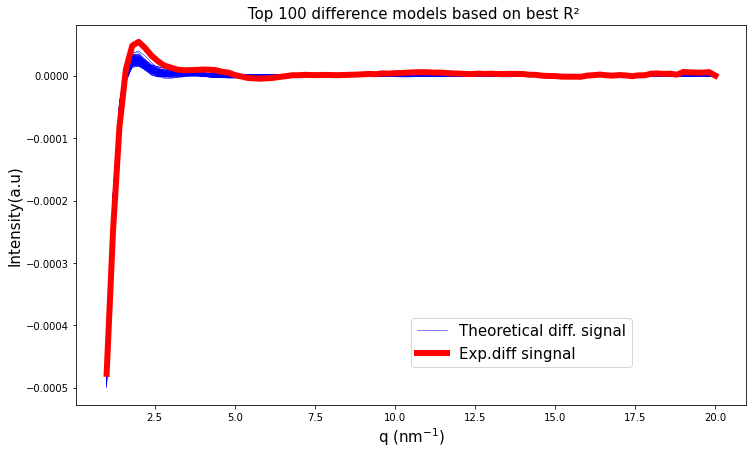

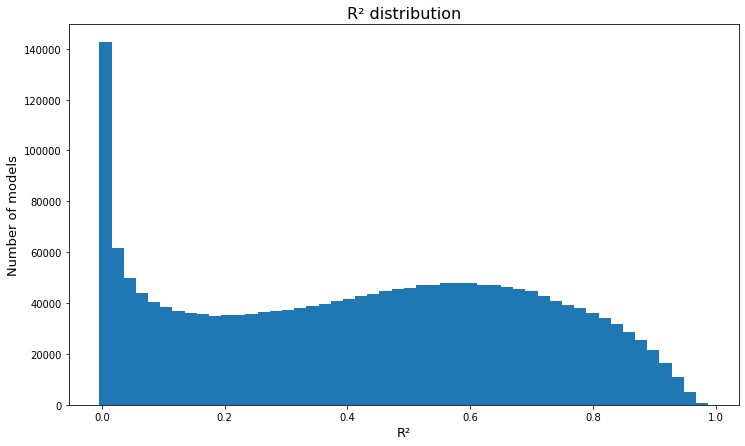

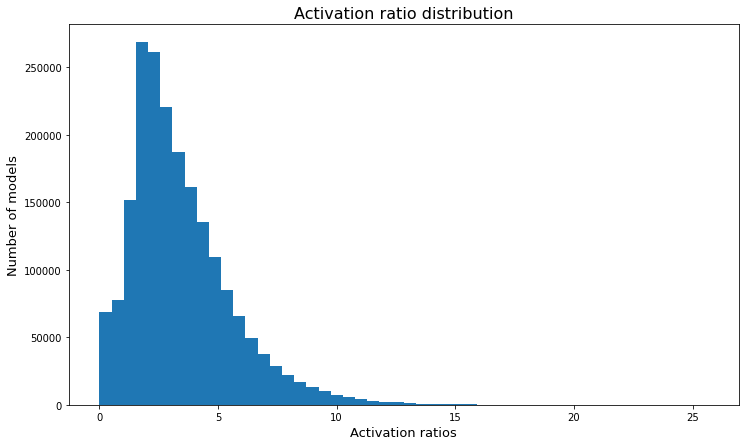

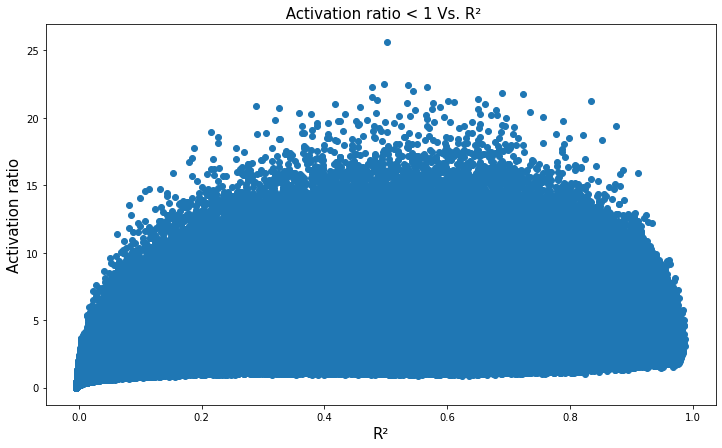

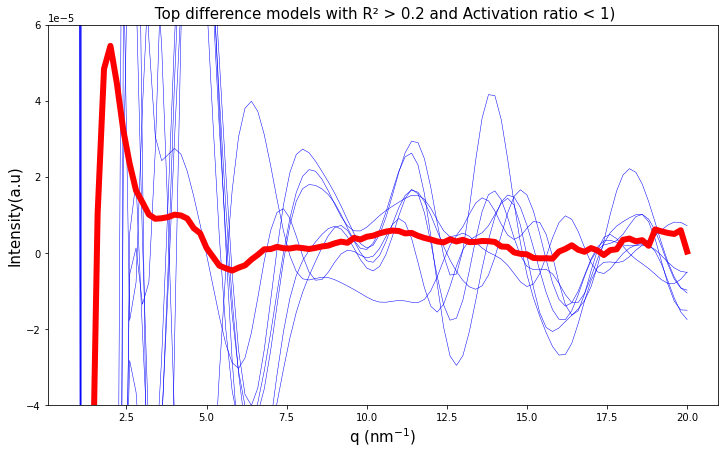

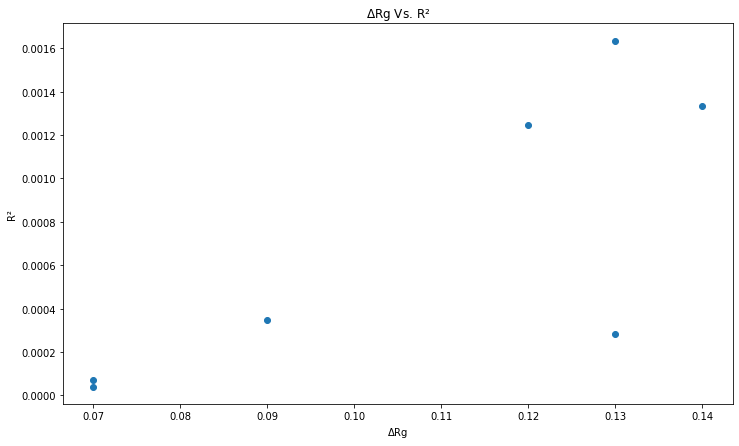

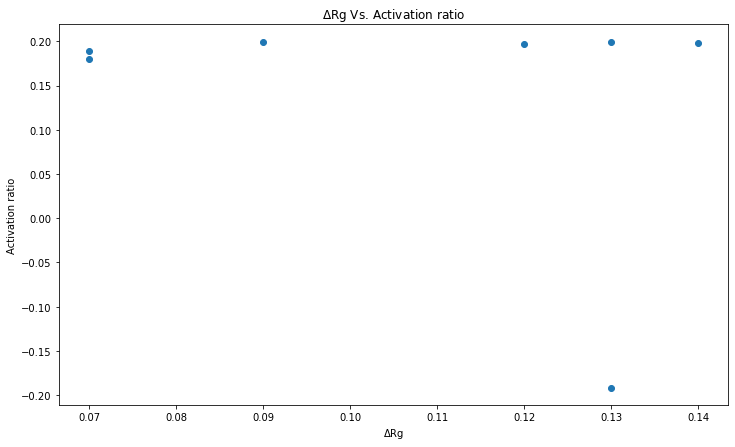

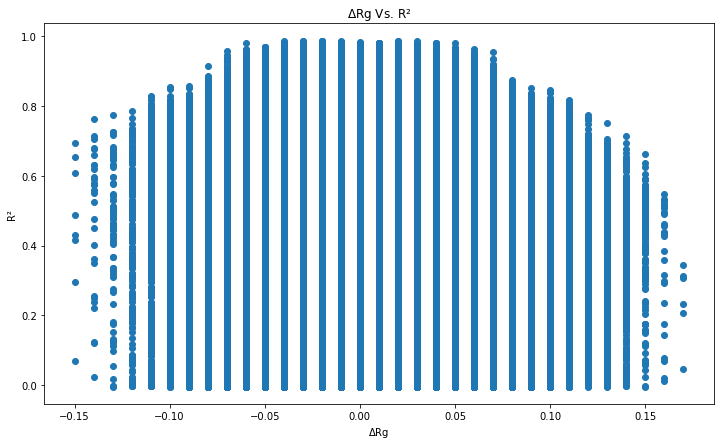

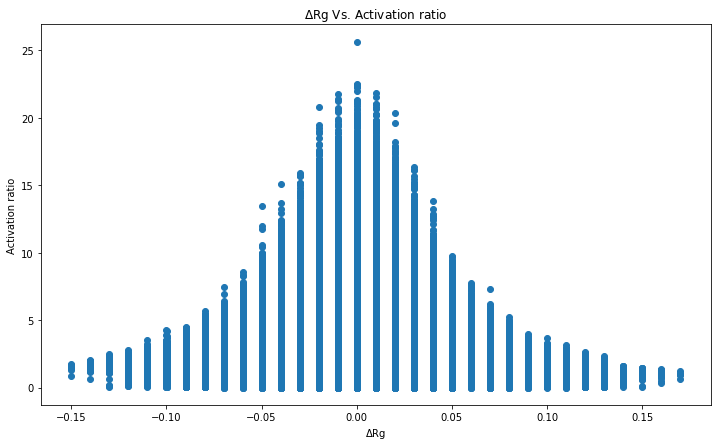

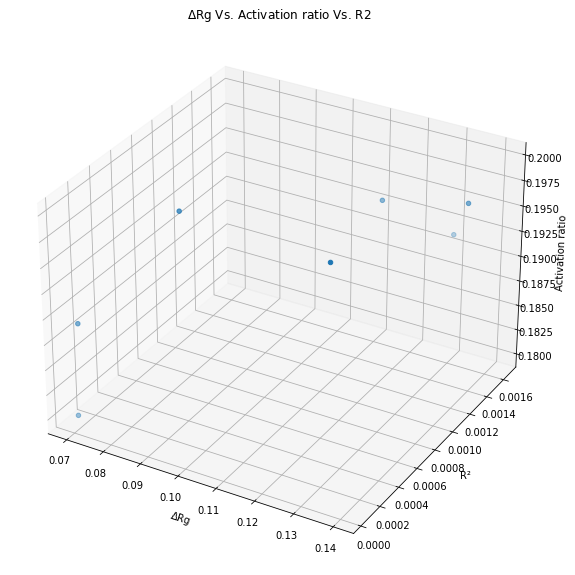

In [865]:
start_n = 0
q_max = 34
q_min = h1_q[0]
plot_top(start_n,2000,q_max,q_min,100)



In [752]:
#Changed to get path, this version only for subset of data (250 models).
def get_data_array(path, start, end):
    files = [os.path.join(path,file) for file in os.listdir(path)]
    files.sort()
    nested_array  = np.zeros((len(files)),dtype=object)
    
    flatten_array = np.empty((0))
    for i,file in enumerate(files):
            data  = np.load(file)
            nested_array[i] = data
            flatten_array = np.concatenate((flatten_array,data))
    return nested_array, flatten_array


def plot_top_r2(start,end,qmax,qmin,x):
    names = os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')
    names.sort()
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
    files.sort()
    
                                         
                                                            
    #Adjust SAXS q
    crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',')*10
    crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
    q_cut = crysol_q[crysol_indices]
    
    #Adjust XFEL q and data 
    h1_af2 = h1[10:255]
    xfel_q = hamburg_q[10:255]
    xfel_indices = np.logical_and(q_min<=h1_q, h1_q<=q_max)
    xfel_q = xfel_q[xfel_indices]
    h1_cut = h1_af2[xfel_indices]
                                                            
    #Data paths
    R2_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/R2.npy'
    corr_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/correlations.npy'
    fopt_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/fopts.npy'
    model1_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/file1_index.npy'
    model2_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/file2_index.npy'
                                                                   
    #Initiate plot
    fig1, ax = plt.subplots(1, 1, figsize=(12, 7))
    
    #Interpolate XFEL data and scale
    exp_interpolated = interpolate_curve(q_cut,xfel_q,h1_cut)
    exp_scaled = exp_interpolated * q_cut

                                                            
    # Start retrieving data                                    
    R2 = np.load(R2_path)
    fopt = np.load(fopt_path)
    corr = np.load(corr_path)
    model1 =np.load(model1_path)
    model2 =np.load(model2_path)
  
    
    R2_indices = R2.argsort() 
    best_indices = R2_indices[-x-1:]
    best_R2 = R2[best_indices]
        
#Add array with correlations of all 
#Plot correlation as function of R2 or reverse

    indices_dark = []
    indices_light = []
 
    
    for index in best_indices:
        m1 = model1[index]
        m2 = model2[index]
        diff = get_diff(q_min,q_max,m1,m2)
        diff_scaled = diff * q_cut
        k,f = SSE(diff,exp_interpolated)
        ax.plot(q_cut, (diff/k), linewidth=0.5, color='Blue') 

        
        if k > 0:
            indices_dark.append(m1)
            indices_light.append(m2)
        
        else:
            indices_dark.append(m2)
            indices_light.append(m1)
            

    #XFEL Plot
    
    ax.plot(q_cut, exp_interpolated, linewidth=6.0, color='Red')
    #ax.plot(q_cut, exp_scaled, linewidth=6.0, color='Red')
    #ax.set_ylim([-4e-4,2e-4])
    ax.set_title(f' Top {n} models from Subset of data (last 250 models)', fontsize=15)
    ax.set_ylabel(f'Intensity(a.u)',fontsize=15)
    ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Top_{n}_models.png',bbox_inches='tight',facecolor=(1, 1, 1))
    

    #fig2, ax2 = plt.subplots(1, 1, figsize=(12, 7))
    #ax2.set_title(' fopt Vs. Pearson Correlation', fontsize=16)
    #ax2.set_ylabel('fopt', fontsize=13)
    #ax2.set_xlabel('Pearson Correlation', fontsize=13)
    #plt.scatter(corr,fopt)
    #plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_CC.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    fig5, ax5 = plt.subplots(1, 1, figsize=(12, 7))
    ax5.set_title('fopt distribution', fontsize=16)
    ax5.set_xlabel('fopt', fontsize=13)
    ax5.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(fopt, bins=50)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_fopt.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    fig7, ax7= plt.subplots(1, 1, figsize=(12, 7))
    ax7.set_title('R² distribution', fontsize=16)
    ax7.set_xlabel('R²',fontsize=13)
    ax7.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(R2, bins=50,range=(-1,1))
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_R2.png',bbox_inches='tight',facecolor=(1, 1, 1))
   
   

    fig6, ax6 = plt.subplots(1, 1, figsize=(12, 7))
    ax6.set_title('Pearson CC distribution', fontsize=16)
    ax6.set_xlabel('Pearson Correlation', fontsize=13)
    ax6.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(corr, bins=50)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_R2.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
     #Plot occurences of model
   
    indices_dark = np.array(indices_dark)
    indices_light = np.array(indices_light)
    
    dark_unique, dark_counts = np.unique(indices_dark, return_counts=True)
    dark_label = [str(i).replace('.0','') for i in dark_unique]
    fig3, ax3 = plt.subplots(1, 1, figsize=(20, 7))
    plt.bar(np.linspace(0,dark_unique.shape[0],num=dark_unique.shape[0]), dark_counts, tick_label=dark_label, width=0.4)
    plt.xticks(rotation = 90)
    ax3.set_title(f'{n} best AF2 dark model candidates', fontsize=16)
    ax3.set_xlabel('Model number', fontsize=13)
    ax3.set_ylabel('Occurences' ,fontsize=13)
     
    
    light_unique, light_counts = np.unique(indices_light, return_counts=True)
    light_label = [str(i).replace('.0','') for i in light_unique]
    fig4, ax4 = plt.subplots(1, 1, figsize=(20, 7))
    plt.bar(np.linspace(0,light_unique.shape[0],num=light_unique.shape[0]), light_counts, tick_label=light_label, width=0.4)
    plt.xticks(rotation = 90)
    ax4.set_title(f'{n} best AF2 light model candidates', fontsize=16)
    ax4.set_xlabel('Model number', fontsize=13)
    ax4.set_ylabel('Occurences' ,fontsize=13)


In [ ]:
#Starting from 1750

### Get Rgs

#### Function

In [753]:
import re 

def get_rg(file):
    f = open(file, 'r')
    match = re.findall(r'\bRg: \w+.\w+', f.readlines()[0])
    rg = match[0].replace('Rg: ','')
    return (rg)
               
def store_rgs():
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/calc_scattering',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/calc_scattering')]
    files.sort()
    print(files[0])
    rgs = np.array(list(map(get_rg,files))).astype(float)
    np.save('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/rgs',rgs)
    print(rgs[0])
               

#### Run

In [1413]:
store_rgs()

/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/calc_scattering/unrelaxed_model_1_1.int
16.34


# EstimateOccupancy

## Scale Theoretical to XFEL

### Func_abs


In [ ]:

def SSE(v1,v2):
    calc_factor = lambda x: np.nansum((v1-(v2*x))**2)
    answer = optimize.fmin(func=calc_factor,x0=0.1,full_output=True,disp=False)
    minimum = answer[0]
    fopt = answer[1]
    return minimum,fopt

def get_diff(q_min,q_max,n,m):
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/abs',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/abs')]
    files.sort()
    #Decide what q-range
    crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',',skiprows=1)*10
    crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
    q_cut = crysol_q[crysol_indices]
    
    
    #print(f'Running {2000-n} models')
    #Iterate over each file in the list of differences
    file1 = files[n]
    file2 = files[m]
    light = np.loadtxt(file1, usecols=2, delimiter=',',skiprows=1)
    dark = np.loadtxt(file2, usecols=2, delimiter=',',skiprows=1)
    af2_diff = (light-dark)[crysol_indices]
    
    return af2_diff

def calc_occupancy(q_min,q_max):
    #Load data
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/abs',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/abs')]
    files.sort()
    light_models = np.load('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/light_indices.npy')
    dark_models = np.load('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/dark_indices.npy')        
    
    #Adjust Theoretical q
    crysol_q = np.loadtxt(files[1], usecols=1, delimiter=',',skiprows=1)*10
    crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
    q_cut = crysol_q[crysol_indices]
    
    #Adjust XFEL q and data 
    xfel = h1[10:255]
    xfel_q = hamburg_q[10:255]
    xfel_indices = np.logical_and(q_min<=h1_q, h1_q<=q_max)
    xfel_q = xfel_q[xfel_indices]
    xfel = xfel[xfel_indices]
                                 

    dark_abs = np.sum(avg_S_off[150:175,:],axis = 0)/25
    dark_abs = (dark_abs - buffer_off*0.905)[10:255]
    dark_abs = dark_abs[xfel_indices]

    interpolated_abs = interpolate_curve(q_cut,xfel_q,dark_abs) 
    interpolated_diff = interpolate_curve(q_cut,xfel_q,xfel) 
    
    
    scale_abs_all = []
    occupancy = []
    for m1,m2 in zip(light_models,dark_models):
        model1 = np.loadtxt(files[m1], usecols=2, delimiter=',', skiprows=1)
        model2 = np.loadtxt(files[m2], usecols=2, delimiter=',',skiprows=1)[crysol_indices]
                         

        scale_abs,fopt = SSE(interpolated_abs, model2)
    
        theoretical_diff = get_diff(q_min,q_max,m1,m2)    

        
        scale_diff,fopt = SSE(interpolated_diff, theoretical_diff)
        scale_abs_all.append(scale_abs)
        occupancy.append((scale_diff/scale_abs)[0])
    
    scale_abs = np.array(scale_abs_all)
    scale_abs = np.mean(scale_abs)
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(24, 7))
    #fig.suptitle('Example of scaled curves',fontsize=10)

    ax1.plot(q_cut, interpolated_abs/scale_abs, linewidth=3.0, color='Red', label='Experimental')
    ax1.plot(q_cut, model2, linewidth=3.0, color='Blue', label='Theoretical')
  
    ax1.legend(loc=(0.75,0.05), frameon = True,fontsize=10)
    ax1.set_yscale('log')
    ax1.set_title(' Exp. abs. signal scaled to Theoretical abs. signal', fontsize=15)
    ax1.set_ylabel('I$_{abs}$(s) [cm$^{-1}$]/c[mg/ml]',fontsize=15)
    ax1.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    #plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Scale_abs.png',bbox_inches='tight',facecolor=(1, 1, 1))

    
    ax2.plot(q_cut, interpolated_diff/scale_diff, linewidth=3.0, color='Red', label='Experimental')
    ax2.plot(q_cut, theoretical_diff, linewidth=3.0, color='Blue', label='Theoretical')

    ax2.legend(loc=(0.75,0.05), frameon = True,fontsize=10)
    ax2.set_title(f' Exp. diff signal scaled to Theoretical diff. signal', fontsize=15)
    ax2.set_ylabel('I$_{abs}$(s) [cm$^{-1}$]/c[mg/ml]',fontsize=15)
    ax2.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Scaled_Example.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
  
    occupancy = np.array(occupancy)    
    
    
    # Plots an example curve to see if the scaling is working
    #print(np.max(theoretical_diff))
    #print(np.max(model2))
    
    
  
    return occupancy

    

### Run Calc. of occupancy and plot histogram Abs scale

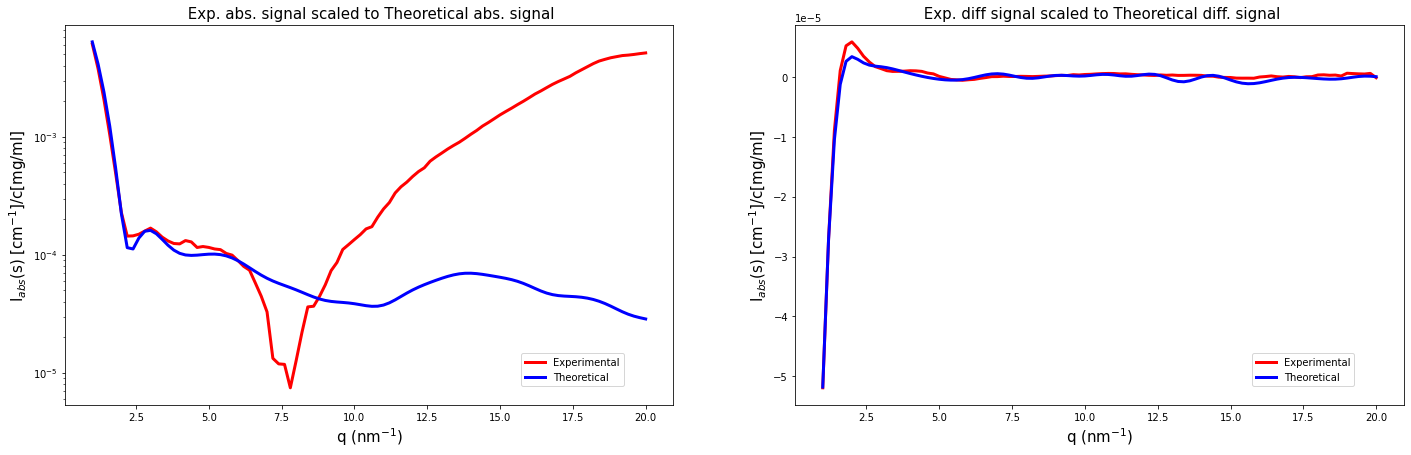

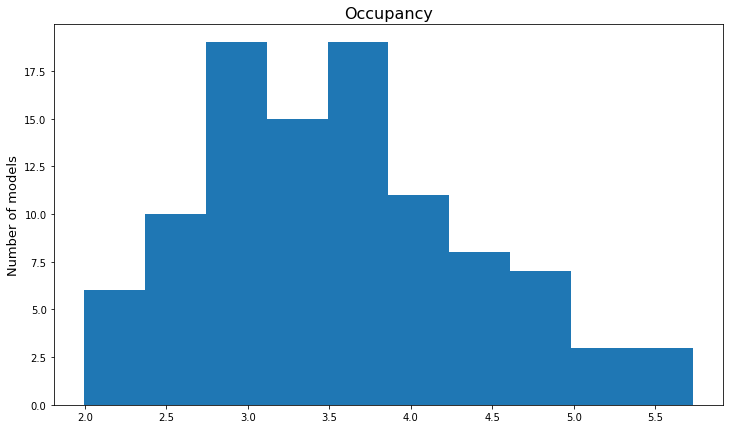

In [484]:
q_max = 20
q_min = h1_q[0]
occupancy=calc_occupancy(q_min,q_max)

fig, ax= plt.subplots(1, 1, figsize=(12, 7))
ax.set_title('Occupancy', fontsize=16)
#ax.set_xlabel('Occupancy',fontsize=13)
ax.set_ylabel('Number of models', fontsize=13)
plot=plt.hist(occupancy, bins=10)


### Run Calc. of occupancy and plot histogram, non abs


In [122]:

def SSE(v1,v2):
    calc_factor = lambda x: np.nansum((v1-(v2*x))**2)
    answer = optimize.fmin(func=calc_factor,x0=0.1,full_output=True,disp=False)
    minimum = answer[0]
    fopt = answer[1]
    return minimum,fopt

def get_diff(q_min,q_max,n,m):
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
    files.sort()
    #Decide what q-range
    crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',')*10
    crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
    q_cut = crysol_q[crysol_indices]
    
    
    #print(f'Running {2000-n} models')
    #Iterate over each file in the list of differences
    file1 = files[n]
    file2 = files[m]
    light = np.loadtxt(file1, usecols=2, delimiter=',')
    dark = np.loadtxt(file2, usecols=2, delimiter=',')
    af2_diff = (light-dark)[crysol_indices]
    
    return af2_diff

def calc_occupancy(q_min,q_max):
    #Load data
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
    files.sort()
    light_models = np.load('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/light_indices.npy')
    dark_models = np.load('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/dark_indices.npy')        
    
    #Adjust Theoretical q
    crysol_q = np.loadtxt(files[1], usecols=1, delimiter=',')*10
    crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
    q_cut = crysol_q[crysol_indices]
    
    #Adjust XFEL q and data 
    xfel = h1[10:255]
    xfel_q = hamburg_q[10:255]
    xfel_indices = np.logical_and(q_min<=h1_q, h1_q<=q_max)
    xfel_q = xfel_q[xfel_indices]
    xfel = xfel[xfel_indices]                                
    

    dark_abs = np.sum(avg_S_off[150:175,:],axis = 0)/25
    dark_abs = (dark_abs - buffer_off*0.905)[10:255]
    dark_abs = dark_abs[xfel_indices]

    interpolated_abs = interpolate_curve(q_cut,xfel_q,dark_abs) * 1e5
    interpolated_diff = interpolate_curve(q_cut,xfel_q,xfel) * 1e5
    
    
    scale_abs_all = []
    occupancy = []
    for m1,m2 in zip(light_models,dark_models):
        model1 = np.loadtxt(files[m1], usecols=2, delimiter=',')
        model2 = np.loadtxt(files[m2], usecols=2, delimiter=',')[crysol_indices]
                         

        scale_abs,fopt = SSE(interpolated_abs, model2)
    
        theoretical_diff = get_diff(q_min,q_max,m1,m2)    

        
        scale_diff,fopt = SSE(interpolated_diff, theoretical_diff)
        scale_abs_all.append(scale_abs)
        occupancy.append((scale_diff/scale_abs)[0])
    
    scale_abs = np.array(scale_abs_all)
    scale_abs = np.mean(scale_abs)
    print(scale_abs, scale_diff)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    ax.plot(q_cut, interpolated_abs/scale_abs, linewidth=3.0, color='Red', label='Experimental')
    ax.plot(q_cut, model2, linewidth=3.0, color='Blue', label='Theoretical')
  
    ax.legend(loc=(0.75,0.05), frameon = True,fontsize=10)
    ax.set_yscale('log')
    ax.set_title(f' Absolute Intensity Dark)', fontsize=15)
    ax.set_ylabel(f'Intensity(a.u)',fontsize=15)
    
    ax.set_ylabel(f'Intensity(a.u)',fontsize=15)
    
    ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)

    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    ax.plot(q_cut, interpolated_diff/scale_abs, linewidth=3.0, color='Red', label='Experimental')
    ax.plot(q_cut, theoretical_diff, linewidth=3.0, color='Blue', label='Theoretical')

    ax.legend(loc=(0.75,0.05), frameon = True,fontsize=10)
    ax.set_title(f' $\Delta$I(q))', fontsize=15)
    ax.set_ylabel(f'Intensity(a.u)',fontsize=15)
    ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    
  
    occupancy = np.array(occupancy)    
    np.save('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/scale_abs',scale_abs)
    
    # Plots an example curve to see if the scaling is working
    #print(np.max(theoretical_diff))
    #print(np.max(model2))
    
    
  
    return occupancy

    

0.000725405759150632 [0.00345459]


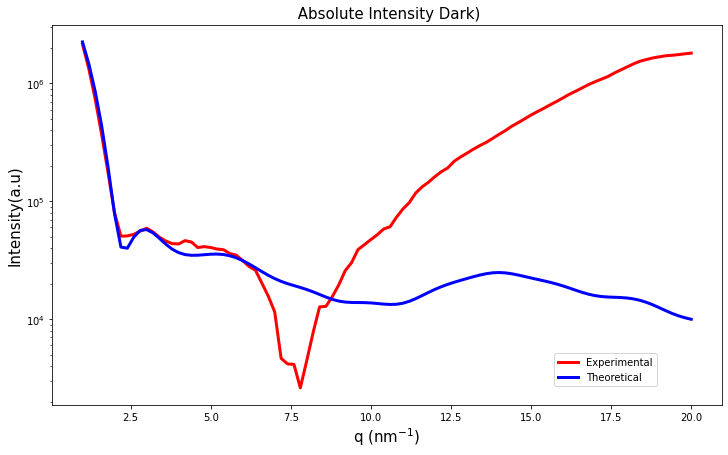

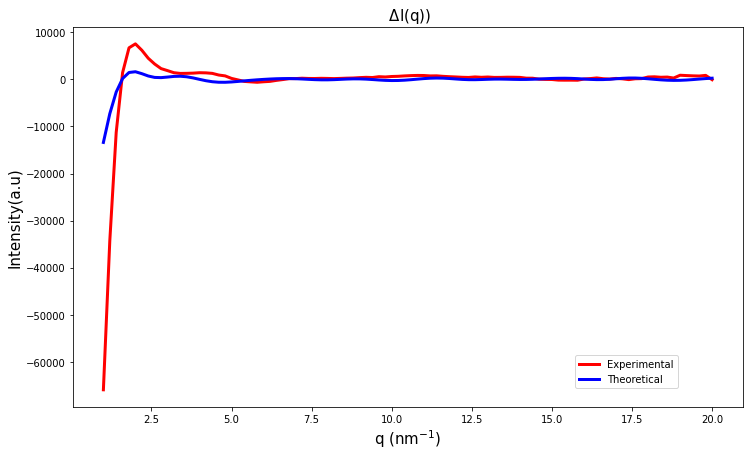

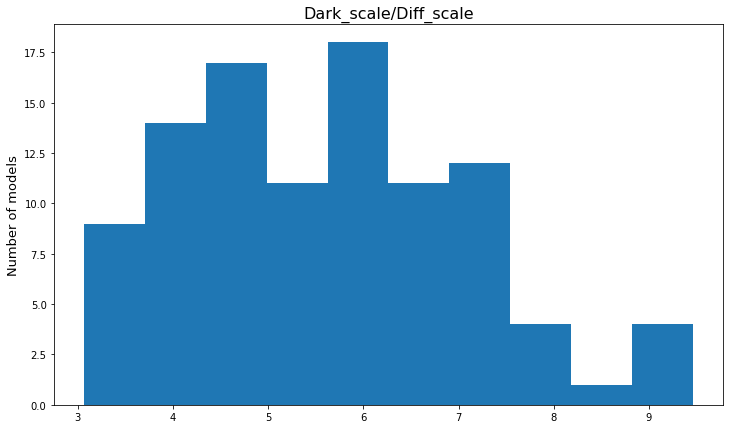

In [123]:
q_max = 20
q_min = h1_q[0]
occupancy=calc_occupancy(q_min,q_max)

fig, ax= plt.subplots(1, 1, figsize=(12, 7))
ax.set_title('Dark_scale/Diff_scale', fontsize=16)
#ax.set_xlabel('Occupancy',fontsize=13)
ax.set_ylabel('Number of models', fontsize=13)
plot=plt.hist(occupancy, bins=10)

### Make matrix for searching

In [ ]:
#Now get the R2 values instead
def get_data_array():
    correlations = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/R2',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/R2')]
    correlations.sort()
    corr_values  = np.zeros((len(correlations)),dtype=object)
    corr_values_flatten = np.empty((0))
    for correlation in correlations:
            data  = np.load(correlation)
            corr_values[correlations.index(correlation)] = data
            if data.size > 0:
                corr_values_flatten = np.concatenate((corr_values_flatten,data))
    return corr_values, corr_values_flatten
        

### Get_diff function

In [1778]:
def get_diff(q_min,q_max,n,m):
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
    files.sort()
    #Decide what q-range
    crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',')*10
    crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
    q_cut = crysol_q[crysol_indices]
    
    
    #print(f'Running {2000-n} models')
    #Iterate over each file in the list of differences
    file1 = files[n]
    file2 = files[m]
    light = np.loadtxt(file1, usecols=2, delimiter=',')
    dark = np.loadtxt(file2, usecols=2, delimiter=',')
    af2_diff = (light-dark)[crysol_indices]
    
    return af2_diff

In [1603]:
def SSE(v1,v2):
    calc_factor = lambda x: np.nansum((v1-(v2*x))**2)
    answer = optimize.fmin(func=calc_factor,x0=1,full_output=True,disp=False)
    minimum = answer[0]
    fopt = answer[1]
    return minimum,fopt

### Plot diff

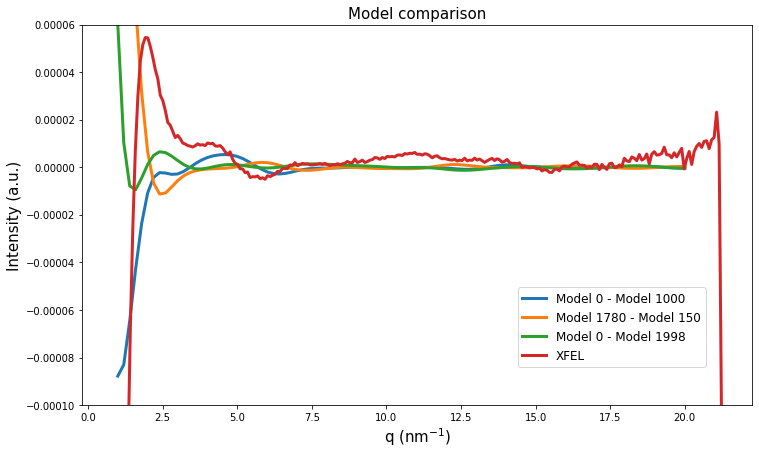

In [23]:
files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
files.sort()
ref = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/ref.txt'
ref = np.loadtxt(ref,usecols=[1,2], delimiter=',').T
crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',')*10
crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
q_cut = crysol_q[crysol_indices]
xfel_indices = np.logical_and(q_min<=h1_q, h1_q<=q_max)

h1_af2 = h1[10:255]
h1_q = hamburg_q[10:255]

m = 0 
n = 100

q_max = 20
q_min = h1_q[0]

diff1 = get_diff(q_min,q_max,0,1000)
diff2 = get_diff(q_min,q_max,1780,150)
diff3 = get_diff(q_min,q_max,160,1998)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))




ax.plot(crysol_q[crysol_indices], diff1*1e-8, linewidth=3.0,label='Model 0 - Model 1000')
ax.plot(crysol_q[crysol_indices], diff2*1e-8, linewidth=3.0,label='Model 1780 - Model 150')
ax.plot(crysol_q[crysol_indices], diff3*1e-8, linewidth=3.0,label='Model 0 - Model 1998')
ax.plot(h1_q[xfel_indices], h1_af2[xfel_indices],linewidth=3.0,label='XFEL')
ax.set_title('Model comparison',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_ylim([-.0001,.00006])
#ax.set_xlim([0.8,3])
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)

ax.legend(loc=(0.65,0.1), frameon = True,fontsize=12)
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/Model_example.png',bbox_inches='tight',facecolor=(1, 1, 1))

## Get Top N Models And Plot

### Functions

In [494]:
#Changed to get R2 instead 
#Update var names
def get_data_array(path):
    files = [os.path.join(path,file) for file in os.listdir(path')]
    files.sort()
    nested_array  = np.zeros((len(correlations)),dtype=object)
    flatten_array = np.empty((0))
    for values in file:
            data  = np.load(correlation)
            corr_values[correlations.index(correlation)] = data
            if data.size > 0:
                corr_values_flatten = np.concatenate((corr_values_flatten,data))
    return corr_values, corr_values_flatten





def plot_top(n,qmax,qmin):
    names = os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')
    names.sort()
    files = [os.path.join('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities',file) for file in os.listdir('/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/intensities')]
    files.sort()
    crysol_q = np.loadtxt(files[0], usecols=1, delimiter=',')*10
    
    R2_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/R2'
    corr_path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/AF2_simulated_xfel_q/correlations'
                                                                   
    crysol_indices = np.logical_and(q_min<=crysol_q, crysol_q<=q_max)
    q_cut = crysol_q[crysol_indices]
    h1_af2 = h1[10:255]
    h1_q = hamburg_q[10:255]
    fig1, ax = plt.subplots(1, 1, figsize=(12, 7))
    xfel_indices = np.logical_and(q_min<=h1_q, h1_q<=q_max)
    xfel_q = h1_q[xfel_indices]
    h1_cut = h1_af2[xfel_indices]
    exp_interpolated = interpolate_curve(q_cut,xfel_q,h1_cut)
    exp_scaled = exp_interpolated * q_cut

    nested_R2, all_R2 = get_data_array()
    
    all_R2_sorted = all_R2.argsort()
    top_R2 = all_R2_sorted[-n-1:]
    top_R2 = all_R2[top_R2]
    R2_indices = np.zeros((n),dtype=object)
    
    for i,array in enumerate(nested_R2):
        for index,r2 in enumerate(top_R2):
            j = np.argwhere(array == r2)
            R2_indices[index] = (i,j[0][0])

#Add array with correlations of all 
#Plot correlation as function of R2 or reverse
            
    for index in indices:
        m1,m2,sign = index
        diff = get_diff(q_min,q_max,m1,m2)
        diff_scaled = diff * q_cut
        #Add get correlation 
        #Add get k factor 
        k,fopt = SSE(diff,exp_interpolated)
        ax.plot(q_cut, (diff/k), linewidth=0.5, color='Blue') 
        
        
            

    #XFEL Plot
    
    ax.plot(q_cut, exp_interpolated, linewidth=6.0, color='Red')
    #ax.plot(q_cut, exp_scaled, linewidth=6.0, color='Red')
    #ax.set_ylim([-4e-4,2e-4])
    ax.set_title(f'Top {n} models', fontsize=15)
    ax.set_ylabel(f'Intensity(a.u)',fontsize=15)
    ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Top_{n}_models.png',bbox_inches='tight',facecolor=(1, 1, 1))
    

    fig2, ax2 = plt.subplots(1, 1, figsize=(12, 7))
    ax2.set_title('Pearson Correlation for AF2 models', fontsize=16)
    ax2.set_xlabel('Pearson Correlation', fontsize=13)
    ax2.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(all_corr, bins=50)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_CC.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    fig5, ax5 = plt.subplots(1, 1, figsize=(12, 7))
    ax5.set_title('R² for AF2 models', fontsize=16)
    ax5.set_xlabel('R²', fontsize=13)
    ax5.set_ylabel('Number of models', fontsize=13)
    plot =plt.hist(all_corr, bins=50)
    plt.savefig(f'/home/leonardo/Solution_Scattering_2208/Plots/Histogram_R2.png',bbox_inches='tight',facecolor=(1, 1, 1))
    
    
    #Plot occurences of model
    indices_tot1 = np.array([i[0] for i in indices])
    indices_tot2 = np.array([i[1] for i in indices])
    indices_tot = np.concatenate((indices_tot1,indices_tot2))
    total_unique, total_counts = np.unique(indices_tot, return_counts=True)
    
    
    indices1_dark = np.array([i[1] for i in indices if i[2] == 1])
    indices2_dark = np.array([i[0] for i in indices if i[2] == -1])
    indices_dark = np.concatenate((indices1_dark,indices2_dark))
    dark_unique, dark_counts = np.unique(indices_dark, return_counts=True)
    dark_label = [str(i).replace('.0','') for i in dark_unique]
    fig3, ax3 = plt.subplots(1, 1, figsize=(20, 7))
    plt.bar(np.linspace(0,dark_unique.shape[0],num=dark_unique.shape[0]), dark_counts, tick_label=dark_label, width=0.4)
    plt.xticks(rotation = 90)
    ax3.set_title(f'{n} best AF2 dark model candidates', fontsize=16)
    ax3.set_xlabel('Model number', fontsize=13)
    ax3.set_ylabel('Occurences' ,fontsize=13)
     
    
    indices1_light = np.array([i[0] for i in indices if i[2] == 1])
    indices2_light = np.array([i[1] for i in indices if i[2] == -1])
    indices_light = np.concatenate((indices1_light,indices2_light))
    light_unique, light_counts = np.unique(indices_light, return_counts=True)
    light_label = [str(i).replace('.0','') for i in light_unique]
    fig4, ax4 = plt.subplots(1, 1, figsize=(20, 7))
    plt.bar(np.linspace(0,light_unique.shape[0],num=light_unique.shape[0]), light_counts, tick_label=light_label, width=0.4)
    plt.xticks(rotation = 90)
    ax4.set_title(f'{n} best AF2 light model candidates', fontsize=16)
    ax4.set_xlabel('Model number', fontsize=13)
    ax4.set_ylabel('Occurences' ,fontsize=13)

    

### Calc top N Models 

[1412595 1784760   77703  251512 1678588]
[ 0.99976956 -0.99977426  0.99979763  0.99980674 -0.99984008]
[ 0.99976956 -0.99977426  0.99979763  0.99980674 -0.99984008]


IndexError: index 4 is out of bounds for axis 0 with size 4

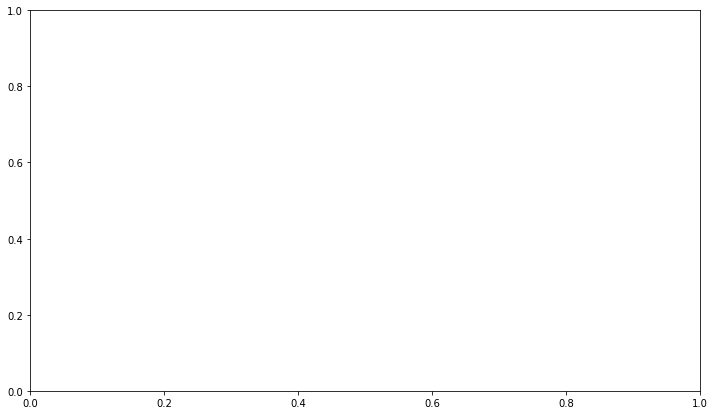

In [493]:
q_max = 34
q_min = h1_q[0]
plot_top(4,q_max,q_min)

# Estimate activation factor FEB 23

bertnsson paper## Load SAXS Data FEB 23 - Measurement 1


### Plot and compare to SAXS NOV 22

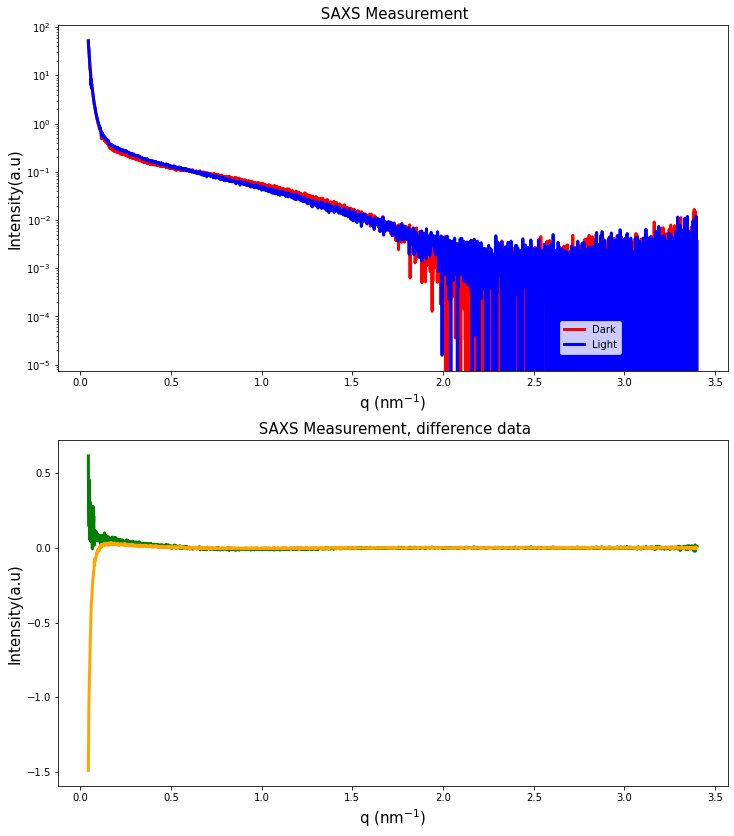

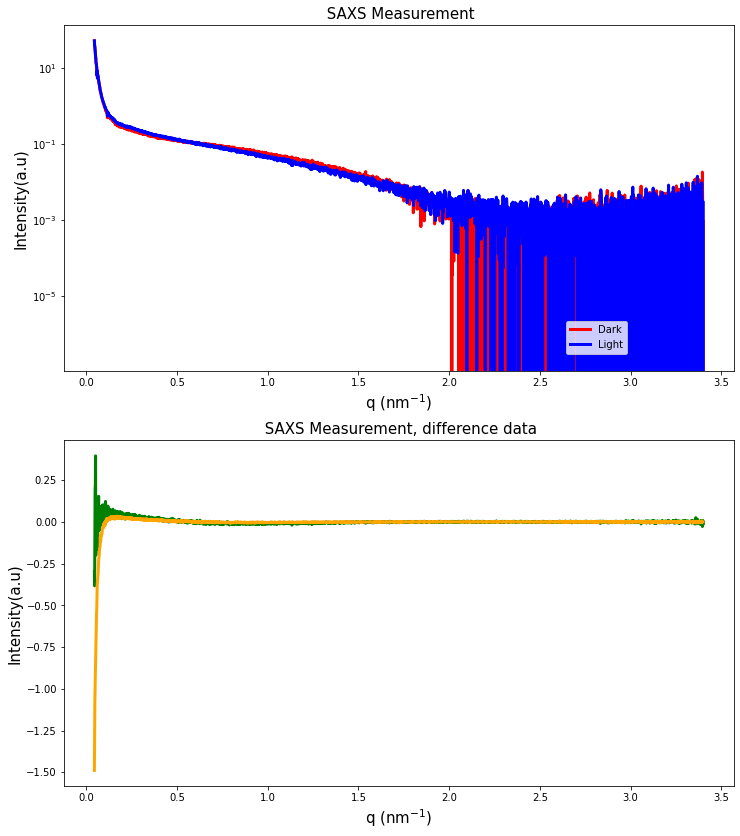

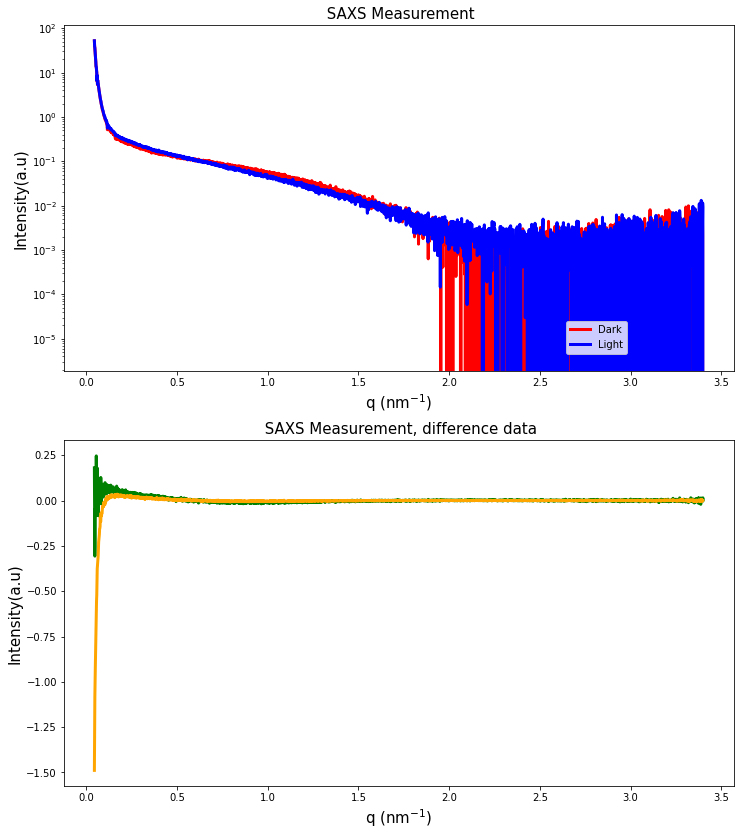

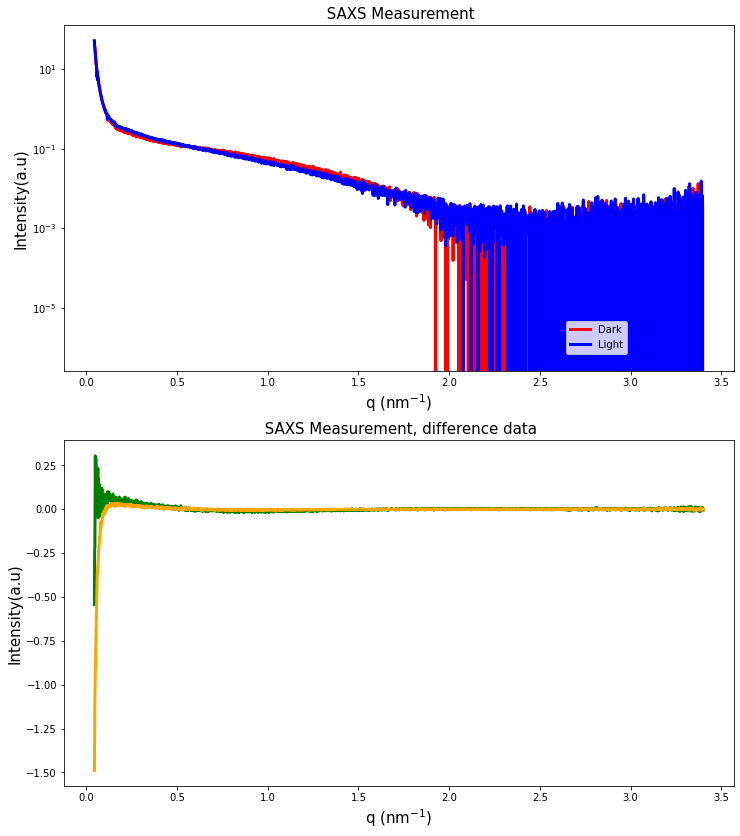

In [823]:
#Load data from Diamond FEB23 and compare to NOV22
dark_files = [os.path.join('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_measurement1_Dark_sub/csv',file) for file in os.listdir('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_measurement1_Dark_sub/csv')]
dark_files.sort()
light_files = [os.path.join('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_measurement1_Light_sub/csv',file) for file in os.listdir('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_measurement1_Light_sub/csv')]
light_files.sort()
    
lights = []
darks = []
E_light = []
E_dark = []


for light,dark in zip(light_files,dark_files):
    light_data = pd.read_csv(light, names=['q', 'I', 'E'],index_col=False)
    dark_data = pd.read_csv(dark, names=['q', 'I', 'E'],index_col=False)
    q_dark =  dark_data['q'].to_numpy()*10
    q_light = light_data['q'].to_numpy()*10
    I_light = light_data['I'].to_numpy()
    I_dark = dark_data['I'].to_numpy()
    e_dark = dark_data['E'].to_numpy()
    e_light = light_data['E'].to_numpy()
    
    E_dark.append(e_dark)
    E_light.append(e_light)
    lights.append((I_light))
    darks.append((I_dark))
    diff = (I_light - I_dark)
    
    
    
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12, 14))
    ax1.plot(q_dark, I_dark, linewidth=3.0, color='Red', label='Dark')
    ax1.plot(q_light, I_light, linewidth=3.0, color='Blue', label='Light')
    ax1.set_yscale('log')
    ax1.legend(loc=(0.75,0.05), frameon = True,fontsize=10)
    ax1.set_title(f' SAXS Measurement', fontsize=15)
    ax1.set_ylabel(f'Intensity(a.u)',fontsize=15)
    ax1.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    
    
    
    ax2.plot(q_light, diff, linewidth=3.0, color='Green', label='Difference')
    ax2.plot(df_temp20['q'].to_numpy()*10, diff_saxs1, linewidth=3.0, color='Orange', label='Difference')
    #ax2.set_yscale('log')
    ax2.set_title(f' SAXS Measurement, difference data', fontsize=15)
    ax2.set_ylabel(f'Intensity(a.u)',fontsize=15)
    ax2.set_xlabel('q (nm$^{-1}$)',fontsize=15)
    
lights = np.array(lights, dtype=float)
darks = np.array(darks, dtype=float)

### Average dark runs and light runs at 10 sec and 20 sec illumination 

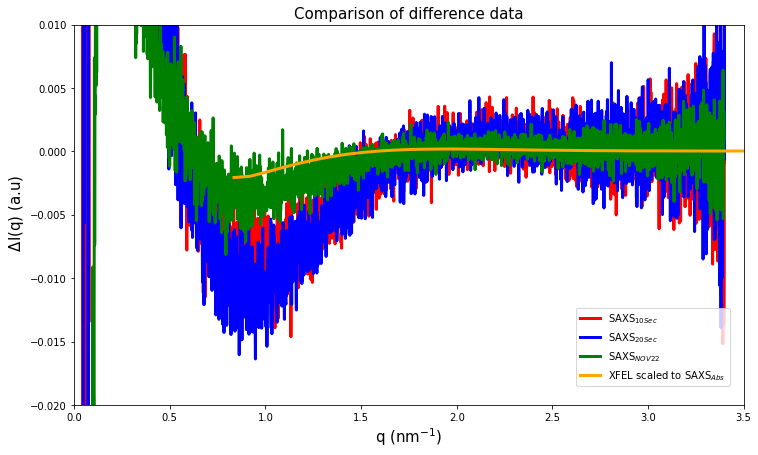

In [836]:
# Average runs
a = lights[0]
light_10sec = (lights[0] + lights[1]) /2
dark_10sec = (darks[0] + darks[1]) /2

light_20sec = (lights[2] + lights[3]) /2
dark_20sec = (darks[2] + darks[3]) /2

diff_10sec =light_10sec - dark_10sec
diff_20sec = light_20sec - dark_20sec

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.set_ylim([-.02,.01])
ax.set_xlim([0,3.5])
ax.set_ylabel(f' $\Delta$I(q) (a.u)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.set_title('Comparison of difference data',fontsize=15)
ax.plot(q_light, diff_10sec, linewidth=3.0, color='Red', label='SAXS$_{10 Sec}$')
ax.plot(q_light, diff_20sec, linewidth=3.0, color='Blue', label='SAXS$_{20 Sec}$')
ax.plot(df_temp20['q'].to_numpy()*10, diff_saxs1, linewidth=3.0, color='Green', label='SAXS$_{NOV22}$')
ax.plot(hamburg_q,h1/abs_scale,linewidth=3.0, label='XFEL scaled to SAXS$_{Abs}$', color='Orange')
ax.legend(loc=(0.75,0.05), frameon = True,fontsize=10)
plt.savefig(f'/home/leonardo/Solution_Scattering_2208/plots/Comparison_of_difference_data.png',bbox_inches='tight',facecolor=(1, 1, 1))

# Average errors
E_light_10sec = (E_light[0] + E_light[1]) /2
E_dark_10sec = (E_dark[0] + E_dark[1]) /2

E_light_20sec = (E_light[2] + E_light[3]) /2
E_dark_20sec = (E_dark[2] + E_dark[3]) /2


## Dark 

### Prep data

In [851]:
dark_exp = np.sum(avg_S_off[150:175,:],axis = 0)/25
dark_exp = dark_exp - buffer_off*0.935
q_range = [1.1,1.2]

q_dark_indices = np.logical_and(q_dark>q_range[0], q_range[1]>q_dark)
exfel_indices = np.logical_and(hamburg_q>q_range[0], q_range[1]>hamburg_q)


q_dark_cut = q_dark[q_dark_indices]
exfel_q =hamburg_q[exfel_indices]

dark_10sec_cut = dark_10sec[q_dark_indices]
E_dark_10sec_cut = E_dark_10sec[q_dark_indices]
dark_exp_cut = dark_exp[exfel_indices]


exp_interpolated_dark = interpolate_curve(q_dark_cut,exfel_q,dark_exp_cut)
dark_scale = chi_sq(dark_10sec_cut,exp_interpolated_dark[0],E_dark_10sec_cut)[0]
print(dark_scale)*
1/dark_scale[0]

Optimization terminated successfully.
         Current function value: 91.590007
         Iterations: 21
         Function evaluations: 42
[4.01544189]


0.24903859307787016

### Plot

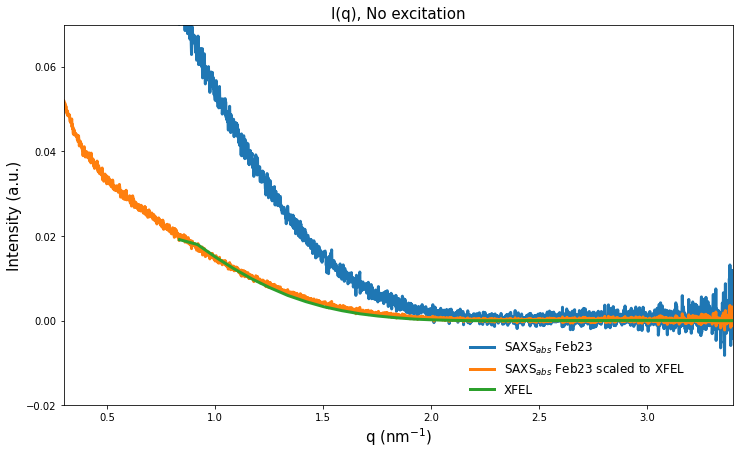

In [854]:
#Plot the dark data from XFEL averaged over runs [172,174,175,1756,180], only dark corresponding to last timepoints taken. 

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
#ax.plot(q_dark, exp_interpolated_dark,linewidth=3.0, label='XFEL_interpolated') 
ax.plot(q_dark, dark_10sec,linewidth=3.0, label='SAXS$_{abs}$ Feb23')
ax.plot(q_dark, dark_10sec*1/3.7,linewidth=3.0, label='SAXS$_{abs}$ Feb23 scaled to XFEL')
ax.plot(hamburg_q, dark_exp,linewidth=3.0, label='XFEL')


ax.legend(loc=(0.6,0.01), frameon = False,fontsize=12)
ax.set_title(r'I(q), No excitation',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.set_ylim([-.02,.07])
#ax.set_yscale('log')
ax.set_xlim([0.3,3.4])
plt.savefig(f'/home/leonardo/Solution_Scattering_2208/plots/Dark_scaled_SAXS_FEB23',bbox_inches='tight',facecolor=(1, 1, 1))

## Diff

### Prep data

In [623]:
diff_exp = h1
q_range = [0.8,1]

q_dark_indices = np.logical_and(q_dark>q_range[0], q_range[1]>q_dark)
exfel_indices = np.logical_and(hamburg_q>q_range[0], q_range[1]>hamburg_q)


q_dark_cut = q_dark[q_dark_indices]
exfel_q =hamburg_q[exfel_indices]

diff_10sec_cut = diff_20sec[q_dark_indices]
E_diff_10sec = E_dark_10sec[q_dark_indices]
diff_exp_cut = diff_exp[exfel_indices]


exp_interpolated_diff = interpolate_curve(q_dark_cut,exfel_q,diff_exp_cut)
diff_scale = chi_sq(diff_10sec_cut,exp_interpolated_diff[0],E_diff_10sec)[0]
print(diff_scale)
1/diff_scale[0]

Optimization terminated successfully.
         Current function value: 99.226501
         Iterations: 17
         Function evaluations: 34
[17.75415039]


0.05632485801900414

### Plot

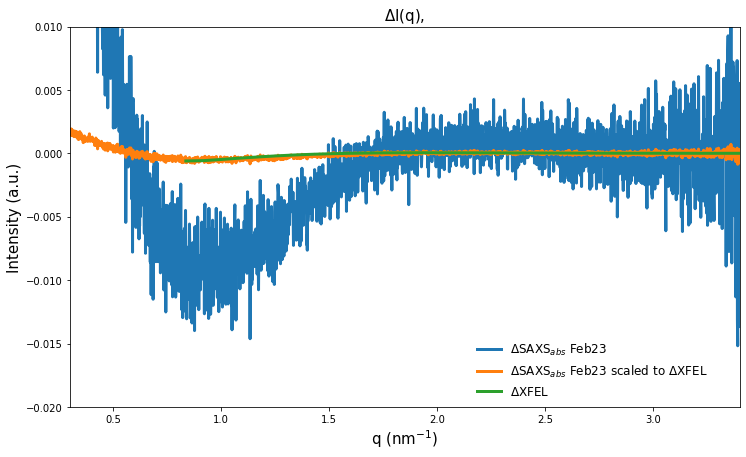

In [859]:
#Plot the dark data from XFEL averaged over runs [172,174,175,1756,180], only dark corresponding to last timepoints taken. 

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
#ax.plot(q_dark, exp_interpolated_dark,linewidth=3.0, label='XFEL_interpolated') 
ax.plot(q_dark, diff_10sec,linewidth=3.0, label=r'$\Delta$SAXS$_{abs}$ Feb23')
ax.plot(q_dark, diff_10sec*1/diff_scale[0],linewidth=3.0, label='$\Delta$SAXS$_{abs}$ Feb23 scaled to $\Delta$XFEL')
ax.plot(hamburg_q, diff_exp,linewidth=3.0, label='$\Delta$XFEL')


ax.legend(loc=(0.6,0.01), frameon = False,fontsize=12)
ax.set_title(r'$\Delta$I(q), ',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.set_ylim([-.02,.01])
ax.set_xlim([0.3,3.4])
plt.savefig(f'/home/leonardo/Solution_Scattering_2208/plots/Diff_scaled_SAXS_FEB23',bbox_inches='tight',facecolor=(1, 1, 1))

### Calc activation factor

In [628]:
# Based on scaling XFEL to exp. 
#
#
activation_factor = (diff_scale/dark_scale)
print(1/diff_scale)
print(dark_scale)
print(activation_factor[0])
print(1/activation_factor[0])

[0.05632486]
[3.45599365]
5.137205729120676
0.19465835178284127


## Load SAXS Data FEB 23 - Measurement 2

In [566]:
#Load data from Diamond FEB23 and compare to NOV22
dark_files = [os.path.join('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_sample2/Dark/csv',file) for file in os.listdir('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_sample2/Dark/csv')]
dark_files.sort()
light_files = [os.path.join('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_sample2/Light/csv',file) for file in os.listdir('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_sample2/Light/csv')]
light_files.sort()

dark_buffer = [os.path.join('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_buffer/csv/dark_buffer', file) for file in os.listdir('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_buffer/csv/dark_buffer')]
dark_buffer.sort()
light_buffer = [os.path.join('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_buffer/csv/light_buffer',file) for file in os.listdir('/home/leonardo/SAXS_DATA_FEB23/AsLOV2_buffer/csv/light_buffer')]
light_buffer.sort()

data = zip(light_files, dark_files,dark_buffer,light_buffer)

lights = []
darks = []
Light_buffer = []
Dark_buffer = []
difference= []

## Need to reformat csv files. 
for light,dark, dark_buffer, light_buffer in data:

    light_data = pd.read_csv(light, names=['q', 'I', 'E'],index_col=False,skiprows=[0,1,2])
    dark_data = pd.read_csv(dark, names=['q', 'I', 'E'],index_col=False,skiprows=[0,1,2])

    dark_buffer_data = pd.read_csv(dark_buffer, names=['q', 'I', 'E'],index_col=False,skiprows=[0,1,2,])
    light_buffer_data = pd.read_csv(light_buffer, names=['q', 'I', 'E'],index_col=False,skiprows=[0,1,2])
    q_dark =  dark_data['q'].to_numpy()*10
    q_light = light_data['q'].to_numpy()*10
    I_light = light_data['I'].to_numpy() - light_buffer_data['I'].to_numpy()
    I_dark = dark_data['I'].to_numpy() - dark_buffer_data['I'].to_numpy()
    diff = (I_light - I_dark)
    
    lights.append(I_light)
    darks.append(I_dark)
    difference.append(diff)

diffs = np.array(difference, dtype=float)
lights = np.array(lights, dtype=float)
darks = np.array(darks, dtype=float)
light_buffer = np.array(Light_buffer, dtype=float)
dark_buffer = np.array(Dark_buffer, dtype=float)


## Plot comparison of diff data, abs data and excited data. 

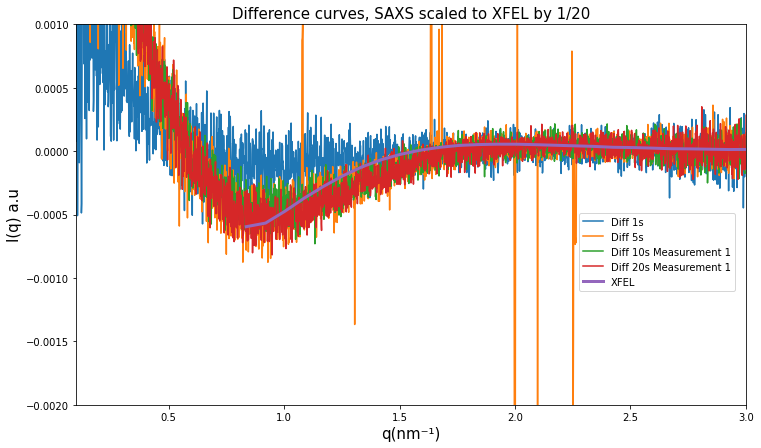

In [739]:
time_points = {0:'1s', 1:'2s', 2:'5s', 3:'10s' }
#fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12, 21))

for i in enumerate(darks):
    dark = i[1]
    i = i[0] 
    ax1.set_title('Absolute curves, dark', fontsize=15)
    ax1.set_xlabel(r'q(nm⁻¹)',fontsize=15)
    ax1.set_ylabel('I(q) a.u', fontsize=15)
    ax1.plot(q_dark,dark, label=f'Dark {time_points[i]}')
    ax1.legend(loc=(0.75,0.5), frameon = True,fontsize=10)

for i in enumerate(lights):
    light = i[1]
    i = i[0] 
    ax2.set_title('Absolute curves, Light', fontsize=15)
    ax2.set_xlabel(r'q(nm⁻¹)',fontsize=15)
    ax2.set_ylabel('I(q) a.u', fontsize=15)
    ax2.plot(q_light,light, label=f'Light {time_points[i]}')
    ax2.legend(loc=(0.75,0.5), frameon = True,fontsize=10)

diffs = lights-darks
fig, ax3 = plt.subplots(1, 1, figsize=(12, 7))
for i in enumerate(diffs):
    diff = i[1]
    i = i[0] 
    if i ==1 or i==3:
        continue
    ax3.set_title('Difference curves, SAXS scaled to XFEL by 1/20', fontsize=15)
    ax3.set_xlabel(r'q(nm⁻¹)',fontsize=15)
    ax3.set_ylabel('I(q) a.u', fontsize=15)
    ax3.plot(q_light,diff/20, label=f'Diff {time_points[i]}')
    ax3.set_ylim([-.002,.001])
    ax3.set_xlim([0.1,3])
    

ax3.plot(q_light,diff_10sec/20, label=f'Diff 10s Measurement 1')
ax3.plot(q_light,diff_20sec/20, label=f'Diff 20s Measurement 1')
ax3.plot(hamburg_q, diff_exp,linewidth=3.0, label='XFEL')
ax3.legend(loc=(0.75,0.3), frameon = True,fontsize=10)

## Visualisation of activation factor


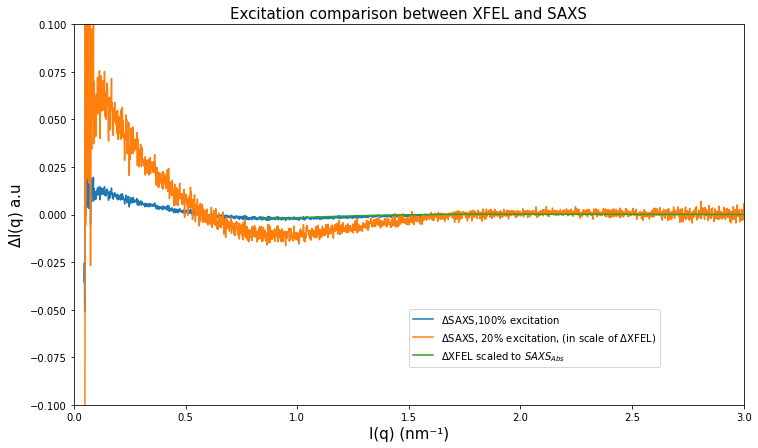

In [835]:
# Interpolate SAXS on XFEL data
differences = np.array([diffs[0], diffs[2], diff_10sec, diff_20sec])
time_points = {0:'1s', 1:'5s', 2:'10s', 3:'20s' }
interpolated_diffs = []
abs_scale = 1/dark_scale

for diff in differences: 
    interpolated_diff = interpolate_curve(hamburg_q,q_light,diff)
    interpolated_diffs.append(interpolated_diff)
    
fig, ax3 = plt.subplots(1, 1, figsize=(12, 7))
for i in enumerate(interpolated_diffs):
    diff = i[1]
    i = i[0]
    #ax3.plot(hamburg_q,diff, label = f'Illumination time: {time_points[i]}')
    ax3.set_xlim([0,3])
    ax3.set_ylim([-0.1,.1])

ax3.plot(q_light,differences[-1]/activation_factor, label = f'$\Delta$SAXS,100% excitation ')
ax3.plot(q_light,differences[-1], label = f'$\Delta$SAXS, 20% excitation, (in scale of $\Delta$XFEL)')
ax3.plot(hamburg_q,diff_exp/abs_scale, label = '$\Delta$XFEL scaled to $SAXS_{Abs}$')
ax3.set_title('Excitation comparison between XFEL and SAXS', fontsize=15)
ax3.set_ylabel(r'$\Delta$I(q) a.u', fontsize=15)
ax3.set_xlabel(r'I(q) (nm⁻¹)', fontsize=15)
#ax3.hlines(0.014, xmin = 0.13, xmax = 0.15, color='black', linestyle='-')
#ax3.hlines(0.07, xmin = 0.13, xmax = 0.15, color='black', linestyle='-')
ax3.legend(loc=(0.5,0.1), frameon = True,fontsize=10)
#ax3.vlines(0.14, ymin = 0.07, ymax = 0.014, color='black', linestyle='-')
#plt.text(0.2,.07,'Activation factor of 0.2')
plt.savefig(f'/home/leonardo/Solution_Scattering_2208/plots/Comparison_of_activation_factor_2.png',bbox_inches='tight',facecolor=(1, 1, 1))



# Test with Unfolded Helix from Collabfold


## Load curve bsaed on data from collab prediction

In [1060]:
path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/NO_helix/no_helix.txt'
nohelix = np.loadtxt(path,usecols=[1,2], delimiter=',',skiprows=1).T

# no helixq = nohelix[0]
q = nohelix[0]
I =nohelix[1]

# Dark
path = '/home/leonardo/Solution_Scattering_2208/AsLOV2/NO_helix/ref/dark.txt'
dark = np.loadtxt(path,usecols=[1,2], delimiter=',',skiprows=1).T
q = dark[0] *10 
I_dark = dark[1]
# Get a dark structure and take nohelix - ref 
theory_diff = (I - I_dark)

            

[5.85253906e-05]
0.8724509337570171
0.09778303522261449
0.9724046682121505


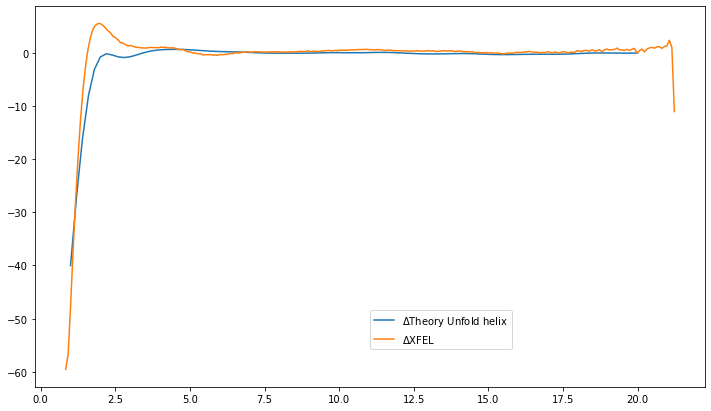

In [1070]:
# Def plot
fig, ax3 = plt.subplots(1, 1, figsize=(12, 7))
theory_diff = I - I_dark

h1_af2 = h1[10:255]
h1_q = hamburg_q[10:255]
q_max,q_min = (h1_q[-1],h1_q[0])
#Decide what q-range
theory_q,crysol_i = cut_q(q,q_max,q_min)
theory_diff = theory_diff[crysol_i]


xfel_q,xfel_i = cut_q(h1_q,q_max,q_min)
xfel_cut = h1_af2[xfel_i]
#interpolate exp diff data
exp_interpolated = interpolate_curve(theory_q,xfel_q,xfel_cut)
exp_scaled_occupancy = exp_interpolated * 1e5
exp_scaled = exp_interpolated*1/theory_q
    
#interpolat exp abs data
dark_abs = np.sum(avg_S_off[150:175,:],axis = 0)/25
dark_abs = (dark_abs - buffer_off*0.905)[10:255]
interpolated_abs = interpolate_curve(theory_q,xfel_q,dark_abs[xfel_i])
# scale theory
theory_scaled = theory_diff * 1/theory_q
# Scale exp. diff and exp. abs to theory (factor of 1*e5 for faster calc.)
scale_diff,fopt_diff = SSE(exp_interpolated * 1e5,theory_diff, 0.0002)
if scale_diff > 0:
    scale_abs,fopt_abs = SSE(interpolated_abs * 1e5, I_dark[crysol_i], 0.0002)
else:
    scale_abs,fopt_abs = SSE(interpolated_abs * 1e5, I[crysol_i], 0.0002)
            
         

            
# Calculate the R2 between intepolated experimental curve and the theoretical curve
r2= calc_r2(exp_interpolated, theory_diff*scale_diff/1e5)
# Calc Pearson CC
corr = np.corrcoef(exp_scaled,theory_scaled, rowvar=True)[0][1]            
# Calc occupance
occupancy = (scale_diff/scale_abs)[0]
            

print(scale_diff)
print(r2)
print(occupancy)
print(corr)


# compare to acutal diff signal both SAXS and XFEL 
#ax3.plot(q_light,differences[-1], label = f'$\Delta$SAXS, 20% excitation, (in scale of $\Delta$XFEL)')
ax3.plot(theory_q,theory_diff*scale_diff, label = f'$\Delta$Theory Unfold helix')
ax3.plot(diff_q,diff_exp * 1e5, label = '$\Delta$XFEL')
ax3.legend(loc=(0.5,0.1), frameon = True,fontsize=10)


# Estimate activation factor - NOV22

## Difference data

In [1467]:
#q range in nm⁻¹
q_range = [hamburg_q[0],diamond_q[-1]*10]

#q_range = [hamburg_q[0],2]

h_indices = hamburg_q<=q_range[1]
hamburg_q_cut = hamburg_q[h_indices]
h1_cut = h1[hamburg_q<=q_range[1]]
diamond_q_cut = diamond_q[np.logical_and(diamond_q >= q_range[0]/10, diamond_q<=q_range[1]/10)]
diff_cut =diff[np.logical_and(diamond_q >= q_range[0]/10, diamond_q<=q_range[1]/10)]
E_diff_cut = E_diff[np.logical_and(diamond_q >= q_range[0]/10, diamond_q<=q_range[1]/10)]
interpolated_h = interpolate_curve(diamond_q_cut*10,hamburg_q_cut,h1_cut)

solution = sse(diff_cut, interpolated_h[0], E_diff_cut)

print(solution[0][0])
1/solution[0][0]
#print(diff.shape)

Optimization terminated successfully.
         Current function value: 1101.788514
         Iterations: 13
         Function evaluations: 26
7.028369140624999


0.14228051771211817

In [1468]:
print('Chi-square minimization for diff data with k=1/10.69 optmized for full q-range:',np.nansum(((interpolated_h[0]-((1/11.07)*diff_cut))/E_diff_cut)**2))
print('Chi-square minimization for diff data with k=1/10.69 optmized for full qmax=3:',np.nansum(((interpolated_h[0]-((1/10.69)*diff_cut))/E_diff_cut)**2))
print('Chi-square minimization for diff data with k=1/10.69 optmized for full qmax2.5:',np.nansum(((interpolated_h[0]-((1/10.23)*diff_cut))/E_diff_cut)**2))
print('Chi-square minimization for diff data with k=1/10.69 optmized for full qmax=2:',np.nansum(((interpolated_h[0]-((1/9.817)*diff_cut))/E_diff_cut)**2))

#print('Least square for diff data with k=1/10.24 optimized with qmax = 2.5 nm⁻¹',np.nansum(())**2)))
#print('Least square for diff data with k=1/9.826 optimized with qmax = 2.0 nm⁻¹',np.nansum((interpolated_h[0]-(1/cut_25)*diff_cut)/(np.std(interpolated_h[0])*E20_cut))**2)
#print('Least square for diff data with k=1/10.24 optimized with qmax = 2.5 nm⁻¹',np.nansum(())**2))
#print('Least square for diff data with k=1/10.71 optimized with qmax = 3.0 nm⁻¹',np.nansum((interpolated_h_dark[0]-(1/cut_3*diff))**2))
#print('Least square for diff data with k=1/11.08 optimized with full q-range (qmax ~3.4 nm⁻¹)',np.nansum((interpolated_h_dark[0]-(1/12*diff))**2))

Chi-square minimization for diff data with k=1/10.69 optmized for full q-range: 14.163375418287108
Chi-square minimization for diff data with k=1/10.69 optmized for full qmax=3: 14.194219176238928
Chi-square minimization for diff data with k=1/10.69 optmized for full qmax2.5: 14.32880471685864
Chi-square minimization for diff data with k=1/10.69 optmized for full qmax=2: 14.563652025335784


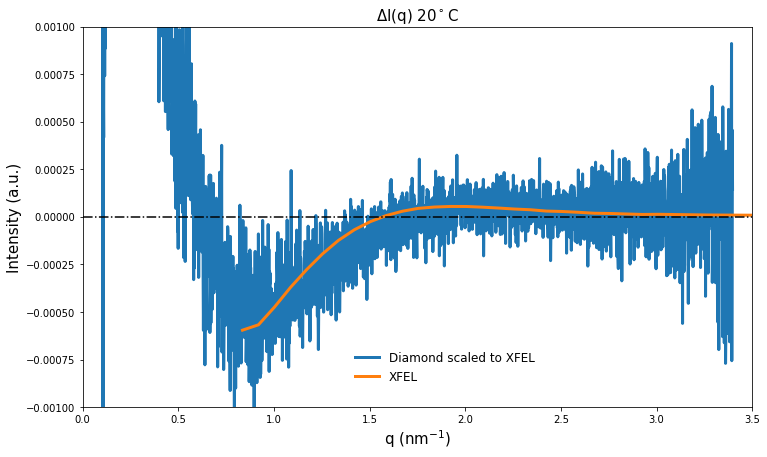

In [1483]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(diamond_q*10,diff*(1/solution[0][0]),linewidth=3.0, label='Diamond scaled to XFEL')
#ax.plot(diamond_q*10,diff*(1/10.23),linewidth=3.0, label='Diamond scaled to XFEL qmax=2.5nm$^{-1}$')
#ax.plot(diamond_q*10,diff*(1/10.69),linewidth=3.0, label='Diamond scaled to XFEL qmax=3.0nm$^{-1}$')
#ax.plot(diamond_q*10,diff_cut*(1/solution[0][0]),linewidth=3.0, label='Diamond scaled to XFEL full q-range')
ax.plot(hamburg_q,h1,linewidth=3.0, label='XFEL')
ax.set_title(r'$\Delta$I(q) 20$^\circ$C',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_ylim([-.001,.001])
ax.set_xlim([0,3.5])
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.legend(loc=(0.4,0.05), frameon = False,fontsize=12)
ax.hlines(0, xmin = q[0], xmax = hamburg_q[-1], color='k', linestyle='-.')
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/Diff_curve_comparison_310123',bbox_inches='tight',facecolor=(1, 1, 1))

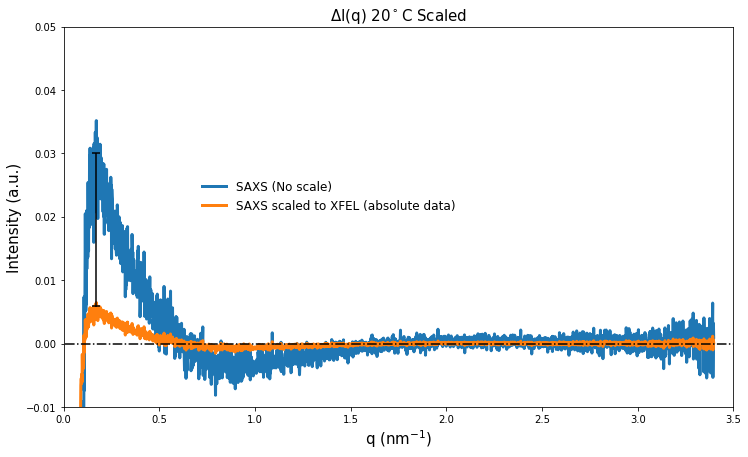

In [1669]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

#SAXS
ax.set_ylim([-.01,.05])
ax.plot(diamond_q*10,diff_cut,linewidth=3.0, label='SAXS (No scale)')
ax.plot(diamond_q*10,diff_cut*(1/(5.42)),linewidth=3.0, label='SAXS scaled to XFEL (absolute data)')
#ax.plot(diamond_q*10,diff_cut*(1/(5.42)*5.42*1.28),linewidth=3.0, label='SAXS scaled to XFEL (absolute data)')
#ax.plot(hamburg_q,h1*(9.817),linewidth=3.0, label='XFEL scaled to Diamond qmax=2nm$^{-1}$')
#ax.plot(hamburg_q,h1*(10.23),linewidth=3.0, label='XFEL scaled to Diamond qmax=2.5nm$^{-1}$')
#ax.plot(hamburg_q,h1*(10.69),linewidth=3.0, label='XFEL scaled to Diamond qmax=3.0nm$^{-1}$')


#XFEL
#ax.set_ylim([-.00004,.0006])
#ax.plot(hamburg_q,h1,linewidth=3.0, label='XFEL no scale')
#ax.plot(hamburg_q,h1*5.42,linewidth=3.0, label='XFEL scaled to Diamond ')

ax.set_title(r'$\Delta$I(q) 20$^\circ$C Scaled',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)

ax.hlines(0.03, xmin = 0.15, xmax = 0.19, color='black', linestyle='-')
ax.hlines(0.006, xmin = 0.15, xmax = 0.19, color='black', linestyle='-')

ax.vlines(0.17, ymin = 0.0058, ymax = 0.03, color='black', linestyle='-')


ax.set_xlim([0,3.5])
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.legend(loc=(0.2,0.5), frameon = False,fontsize=12)
ax.hlines(0, xmin = q[0], xmax = hamburg_q[-1], color='k', linestyle='-.')
#plt.savefig(f'/home/leonardo/SAXS_222711/Plots/Diff_curve_scaled_ratio',bbox_inches='tight',facecolor=(1, 1, 1))

In [1655]:
no_scale = .03
scale = np.nanmax(diff_cut/5.42)

1/0.78
ratio=(no_scale-scale)/no_scale

print(1/ratio)
print(5.42/ratio)



1.2760247043405246
6.916053897525643


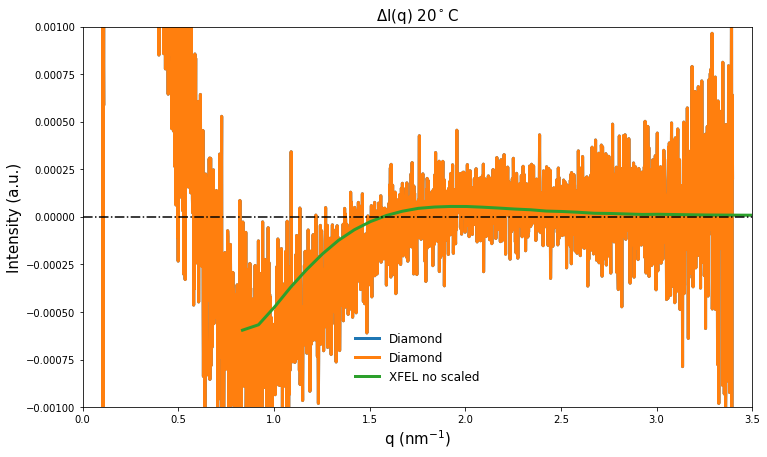

In [1553]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

diff_htest = light_h-dark_h


ax.plot(diamond_q*10,diff_cut*(1/5),linewidth=3.0, label='Diamond')

ax.plot(diamond_q*10,diff_cut*(1/5),linewidth=3.0, label='Diamond')

ax.plot(hamburg_q,h1,linewidth=3.0, label='XFEL no scaled')



ax.set_title(r'$\Delta$I(q) 20$^\circ$C',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_ylim([-.001,.001])
ax.set_xlim([0,3.5])
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.legend(loc=(0.4,0.05), frameon = False,fontsize=12)
ax.hlines(0, xmin = q[0], xmax = hamburg_q[-1], color='k', linestyle='-.')
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/Diff_curve_comparison_reverse_310123',bbox_inches='tight',facecolor=(1, 1, 1))




## Absolute data

### Dark

In [295]:
dark_h = np.sum(avg_S_off[150:175,:],axis = 0)/25
dark_h = (dark_h - buffer_off*0.935)[10:255]
interpolated_h_dark = interpolate_curve(diamond_q*10,hamburg_q[10:255],dark_h)
solution_dark = SSE(dark_I1,interpolated_h_dark[0])
print(solution_dark[0][0])
1/solution_dark[0][0]

4.266015625000014


0.23441076824466547

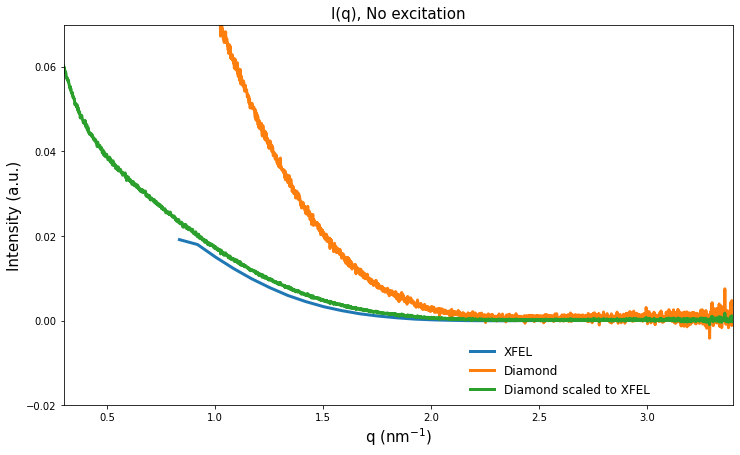

In [296]:
#Plot the dark data from XFEL averaged over runs [172,174,175,1756,180], only dark corresponding to last timepoints taken. 

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(hamburg_q[10:255], dark_h,linewidth=3.0, label='XFEL')
ax.plot(diamond_q*10, dark_I1,linewidth=3.0, label='Diamond')

ax.plot(diamond_q*10, dark_I1*1/solution_dark[0][0],linewidth=3.0, label='Diamond scaled to XFEL')


ax.legend(loc=(0.6,0.01), frameon = False,fontsize=12)
ax.set_title(r'I(q), No excitation',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.set_ylim([-.02,.07])
ax.set_xlim([0.3,3.4])
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/No_excitation_310123',bbox_inches='tight',facecolor=(1, 1, 1))

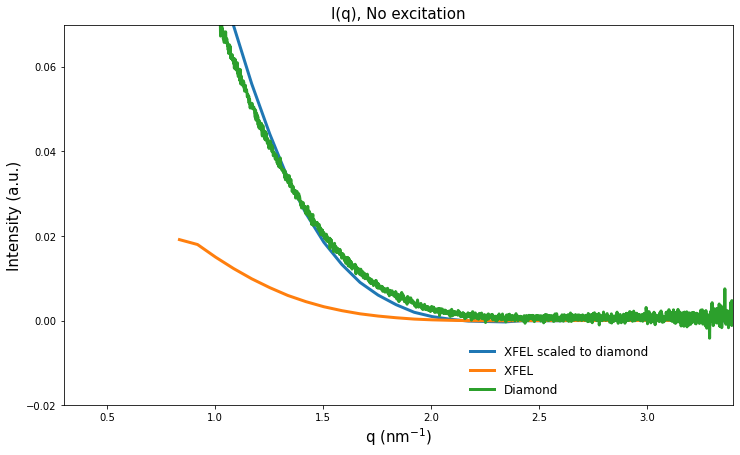

In [2176]:
#Plot the dark data from XFEL averaged over runs [172,174,175,1756,180], only dark corresponding to last timepoints taken. 

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(hamburg_q,(dark_h)*(5.67),linewidth=3.0, label='XFEL scaled to diamond')
ax.plot(hamburg_q,(dark_h),linewidth=3.0, label='XFEL ')
ax.plot(diamond_q*10, dark_I1,linewidth=3.0, label='Diamond')




ax.legend(loc=(0.6,0.01), frameon = False,fontsize=12)
ax.set_title(r'I(q), No excitation',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.set_ylim([-.02,.07])
ax.set_xlim([0.3,3.4])
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/No_excitation_reverse_310123_old',bbox_inches='tight',facecolor=(1, 1, 1))

In [2164]:
from fractions import Fraction
activation_factor=solution_dark[0][0]/solution[0][0]
print(activation_factor)
print(1/activation_factor)


NameError: name 'solution' is not defined

### Light

In [2177]:
light_h=np.sum(avg_S_on[150:175,:],axis = 0)/25
light_h = light_h - buffer_on*0.935
interpolated_h_light = interpolate_curve(diamond_q*10,hamburg_q,light_h)
solution_light = sse(light_I1,interpolated_h_light[0], E_light)
print(solution_light[0][0])
print(1/solution_light[0][0])

Optimization terminated successfully.
         Current function value: 5165.846266
         Iterations: 18
         Function evaluations: 36
5.025524902343747
0.19898418959850966


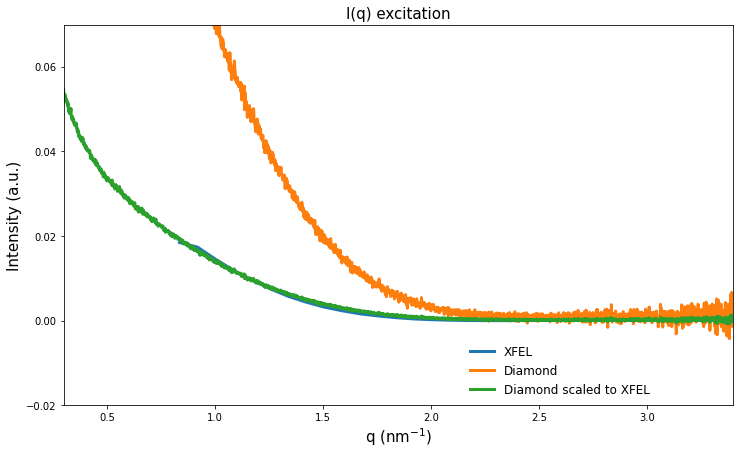

In [2178]:
#Plot the light data from XFEL averaged over runs [172,174,175,1756,180], only dark corresponding to last timepoints taken. 

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(hamburg_q, light_h,linewidth=3.0, label='XFEL')
ax.plot(diamond_q*10, light_I1,linewidth=3.0, label='Diamond')
ax.plot(diamond_q*10, light_I1*1/solution_light[0][0],linewidth=3.0, label='Diamond scaled to XFEL')


ax.legend(loc=(0.6,0.01), frameon = False,fontsize=12)
ax.set_title(r'I(q) excitation',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.set_ylim([-.02,.07])
ax.set_xlim([0.3,3.4])
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/excitation',bbox_inches='tight',facecolor=(1, 1, 1))

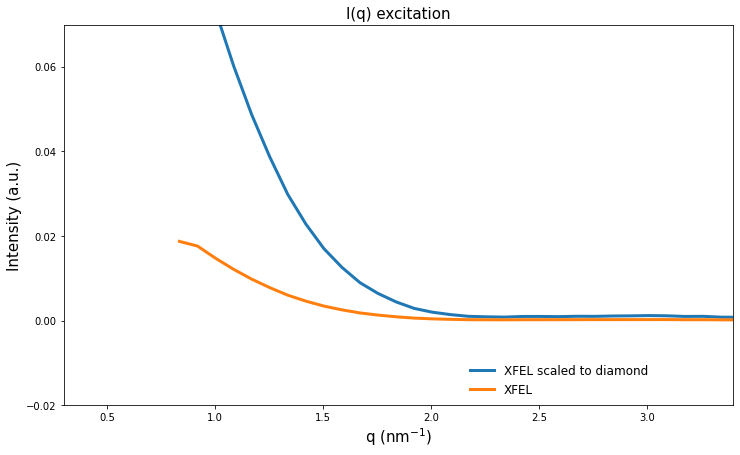

In [2153]:
#Plot the light data from XFEL averaged over runs [172,174,175,1756,180], only dark corresponding to last timepoints taken. 

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(hamburg_q,(light_h)*solution_dark[0][0],linewidth=3.0, label='XFEL scaled to diamond')
ax.plot(hamburg_q,(light_h),linewidth=3.0, label='XFEL')
#ax.plot(diamond_q*10, light_I1,linewidth=3.0, label='Diamond')




ax.legend(loc=(0.6,0.01), frameon = False,fontsize=12)
ax.set_title(r'I(q) excitation',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)
ax.set_ylim([-.02,.07])
ax.set_xlim([0.3,3.4])
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/No_excitation',bbox_inches='tight',facecolor=(1, 1, 1))

### Light and Dark


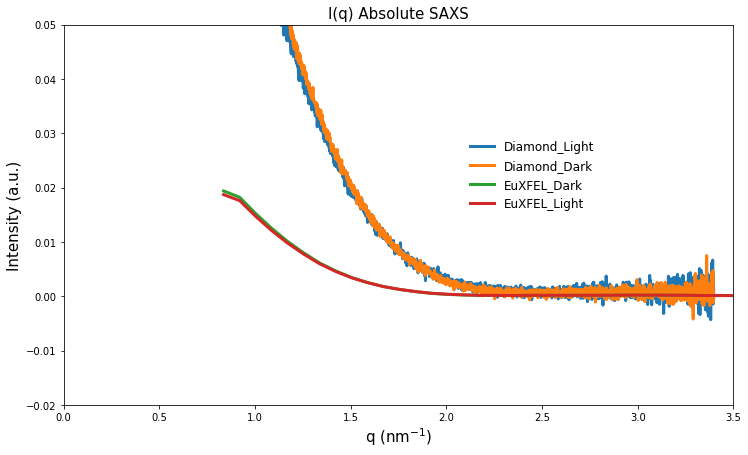

In [2152]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
#solution = sse(light_I1, dark_I1, E_diff)
#print(solution[0][0])

ax.plot(diamond_q*10, light_I1,linewidth=3.0, label='Diamond_Light')
ax.plot(diamond_q*10, dark_I1,linewidth=3.0, label='Diamond_Dark')


ax.plot(hamburg_q, dark_h,linewidth=3.0, label='EuXFEL_Dark')
ax.plot(hamburg_q, light_h,linewidth=3.0, label='EuXFEL_Light')

#ax.plot(diamond_q, dark_I1,linewidth=3.0, label='Diamond_Dark_scaled')
ax.legend(loc=(0.6,0.5), frameon = False,fontsize=12)
ax.set_title(r'I(q) Absolute SAXS',fontsize=15)
ax.set_ylabel('Intensity (a.u.)',fontsize=15)
ax.set_xlabel('q (nm$^{-1}$)',fontsize=15)#ax.set_ylim([-.02,.02])
ax.set_xlim([0,3.5])
ax.set_ylim([-.02,.05])
plt.savefig(f'/home/leonardo/SAXS_222711/Plots/Light_Dark_comparison',bbox_inches='tight',facecolor=(1, 1, 1))